In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import sgkit as sg

In [ ]:
(ds
 .pipe(sg.sample_stats)
 .pipe(sg.variant_stats)
 .pipe(lambda ds: ds.sel(variants=((1688288 < ds.variant_position ) & (ds.variant_position < 1690120) ).compute()))
 .variant_allele_frequency[:,:2].min(dim='alleles').to_series()
 .plot.hist(bins=50)
)

In [132]:
ds2 = sg.load_dataset('results/zarrs/Hinf_norm_genes_mic.zarr')
(
    ds2
    .pipe(sg.sample_stats)
    .pipe(sg.variant_stats)
    .pipe(lambda ds: ds.sel(variants=((1688288 < ds.variant_position ) & (ds.variant_position < 1690120) ).compute()))

    
)
(1690120 - 1688287) / 3

611.0

In [2]:
dsds = sg.load_dataset('results/zarrs/Hinf_norm_temp.zarr/')

# dsds = (
#     dsds
#     .pipe(filter_maximum_hetero)
#     .pipe(remove_heterozgous_variants)
# )
dsds['call_dosage'] = dsds.call_genotype[:,:,0]

dsds = sg.window_by_position(
            dsds, size=50_000, offset=-25_000
        )

ld = sg.ld_matrix(dsds).compute()


In [ ]:
import matplotlib.pyplot as plt

x = ld[ld.i == 4].j
y = ld[ld.i == 5044514].value
plt.scatter(x,y, s=1)



In [ ]:
import pandas as pd
df_one = pd.read_feather('results/feather/Hinf_norm_genes_bin.feather')
df_one.drop(['samples', 'FullID', 'Perc.ReadsMapped', 'CoverageMappedReads', 'origin', 'AMP', 'AMP_MIC', 'serotype', 'beta_lactamase'], axis=1)

In [101]:
import pandas as pd

(
    pd.read_csv('vcf_Haemophilus/annotation_files/Hinf_Rd-KW20v3_DSM11121_2023-06-15_genes.txt', sep='\t')
    .assign(start_adjst=lambda x: x[['start', 'stop']].min(axis=1),
            end_adjst=lambda x: x[['start', 'stop']].max(axis=1)).dtypes
    # .to_csv('vcf_Haemophilus/annotation_files/Hinf_Rd-KW20v3_DSM11121_2023-06-15_genes_adjst.txt', sep='\t')
)



# ID               object
name               object
start               int64
stop                int64
frame              object
product            object
description        object
function           object
cogcats            object
status_region      object
status_function    object
type               object
region_number      object
function_number    object
start_adjst         int64
end_adjst           int64
dtype: object

<Axes: ylabel='Frequency'>

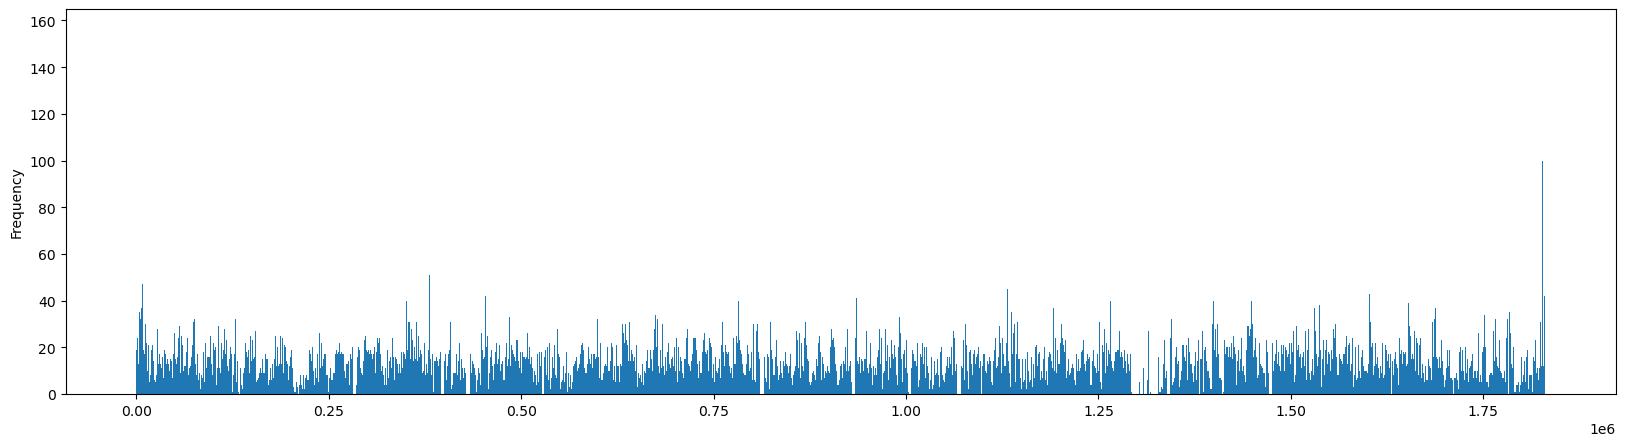

In [99]:
dsds = sg.load_dataset('results/zarrs/Hinf_norm.zarr/')
dsds.variant_position.to_series().plot.hist(bins=20_000, figsize=(20,5))

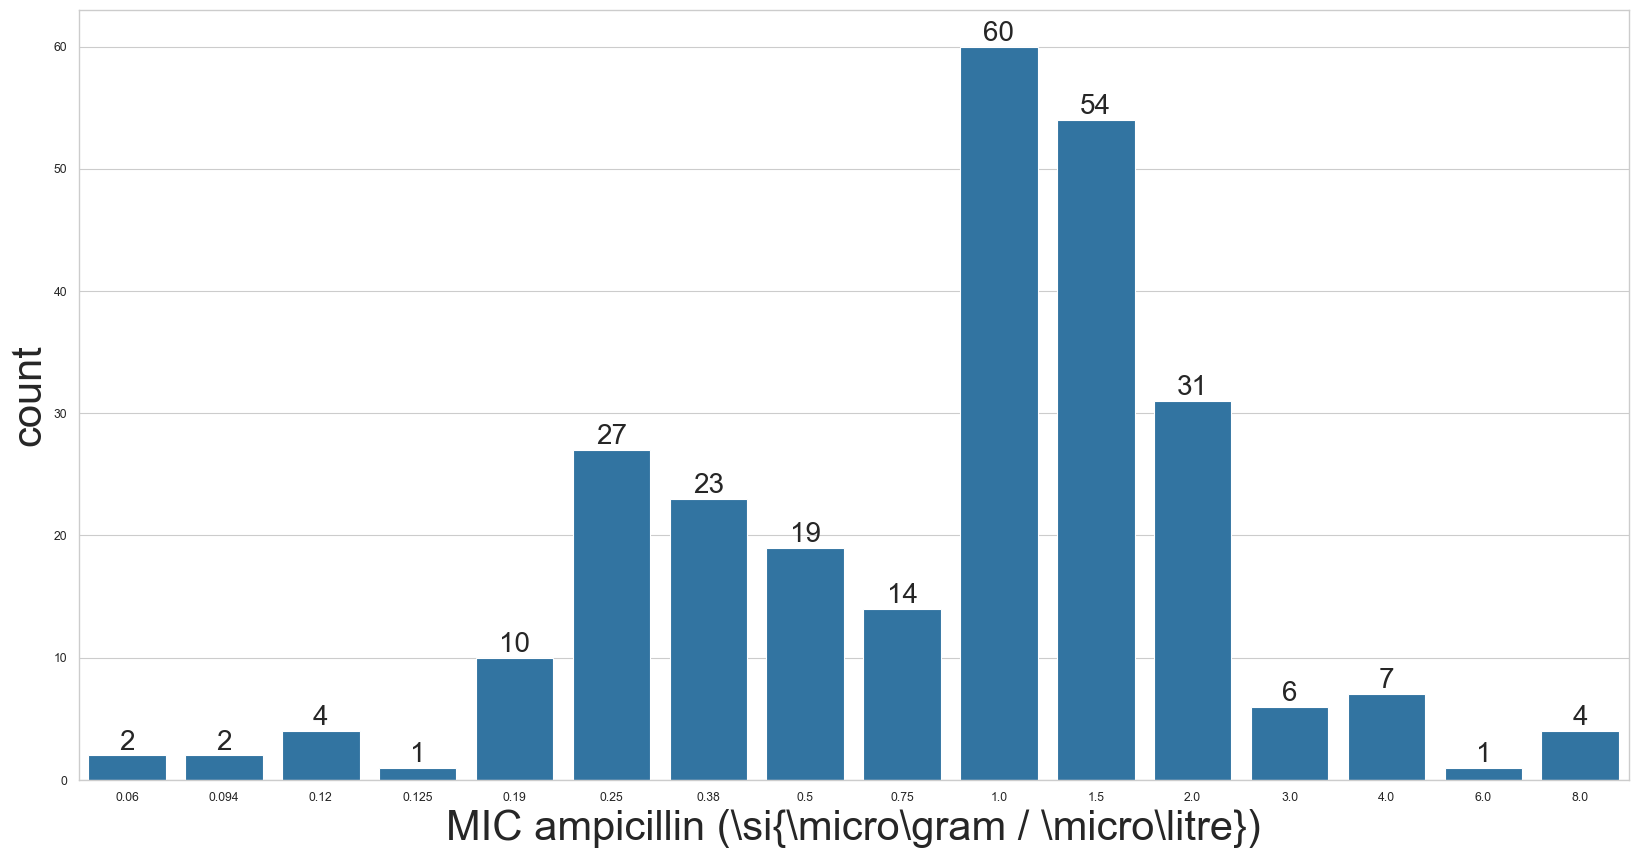

In [59]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# pgf_with_latex = {                      # setup matplotlib to use latex for output
#     "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
#     "text.usetex": True,                # use LaTeX to write all text
#     "font.family": "Arial",
#     # "font.sans-serif": "Helvetica",
#     "text.latex.preamble": "\n".join([ # plots will use this preamble
#         r"\usepackage[utf8]{inputenc}",
#         r"\usepackage[T1]{fontenc}",
#         r"\usepackage[detect-all,locale=DE]{siunitx}",
#         ])
#     }
# mpl.rcParams.update(pgf_with_latex)


df_mics = pd.read_feather('../results/feather/Hinf_norm_mic.feather')
df_mics = (df_mics
             .assign(AMP_MIC= df_mics['AMP_MIC']
                     # .replace('>8', '8')
                     .astype('float'))
           # .query('AMP_MIC < 200')
)

counts_all= (df_mics.AMP_MIC
             .value_counts()
             .sort_index())

counts_s= (df_mics[df_mics.AMP == 'S']
           .AMP_MIC
           .value_counts()
           .sort_index()
          )

counts_r= (df_mics[df_mics.AMP == 'R']
           .AMP_MIC
           .value_counts()
           .sort_index()
          )


# fig, ax = plt.subplots(1,3, sharey=True, figsize=(30,5))
# sns.barplot(x=counts_all.index, y=counts_all.values, ax=ax[0], color='lightblue')
# ax[0].set_xlabel('Minimum inhibitory concentration')
# # sns.kdeplot(x=np.log2(counts_all.index),  ax=ax[0], bw_method=0.5)
# sns.barplot(x=counts_s.index, y=counts_s.values, ax=ax[1], color='lightblue')
# ax[1].set_xlabel('Minimum inhibitory concentration')
# sns.barplot(x=counts_r.index, y=counts_r.values, ax=ax[2], color='lightblue')
# ax[2].set_xlabel('Minimum inhibitory concentration')
# ax[0].set_ylabel('Frequency')



# for ax in ax:
#     ax.bar_label(ax.containers[0])
# sns.set(font_scale = 3.5)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=counts_all.index, y=counts_all.values, ax=ax)
# ax.set(xlabel='MIC ampicillin', ylabel='count', fontsize=50)
ax.set_xlabel(r'MIC ampicillin (\si{\micro\gram / \micro\litre})', fontsize=30)
ax.set_ylabel('count', fontsize=30)
ax.bar_label(ax.containers[0], fontsize=20)
sns.set_style("whitegrid")

# fig.savefig("f.pdf")

<Axes: xlabel='MIC ampicillin', ylabel='Density'>

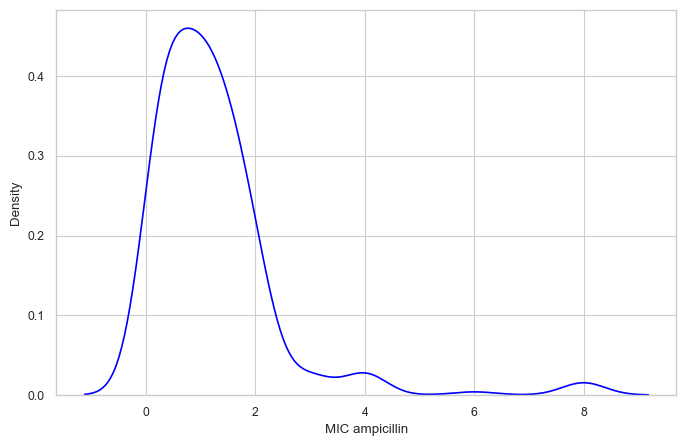

In [71]:
# sns.set(font_scale = 2.5)
import numpy as np
fig, ax = plt.subplots(figsize=(8,5))
ax.set(xlabel='MIC ampicillin')
# ax.set(xscale='log')
# sns.kdeplot(data=df_mics, x='AMP_MIC', color='blue', ax=ax)
sns.kdeplot(data=df_mics.AMP_MIC, color='blue', ax=ax)

<Axes: xlabel='AMP_MIC', ylabel='Density'>

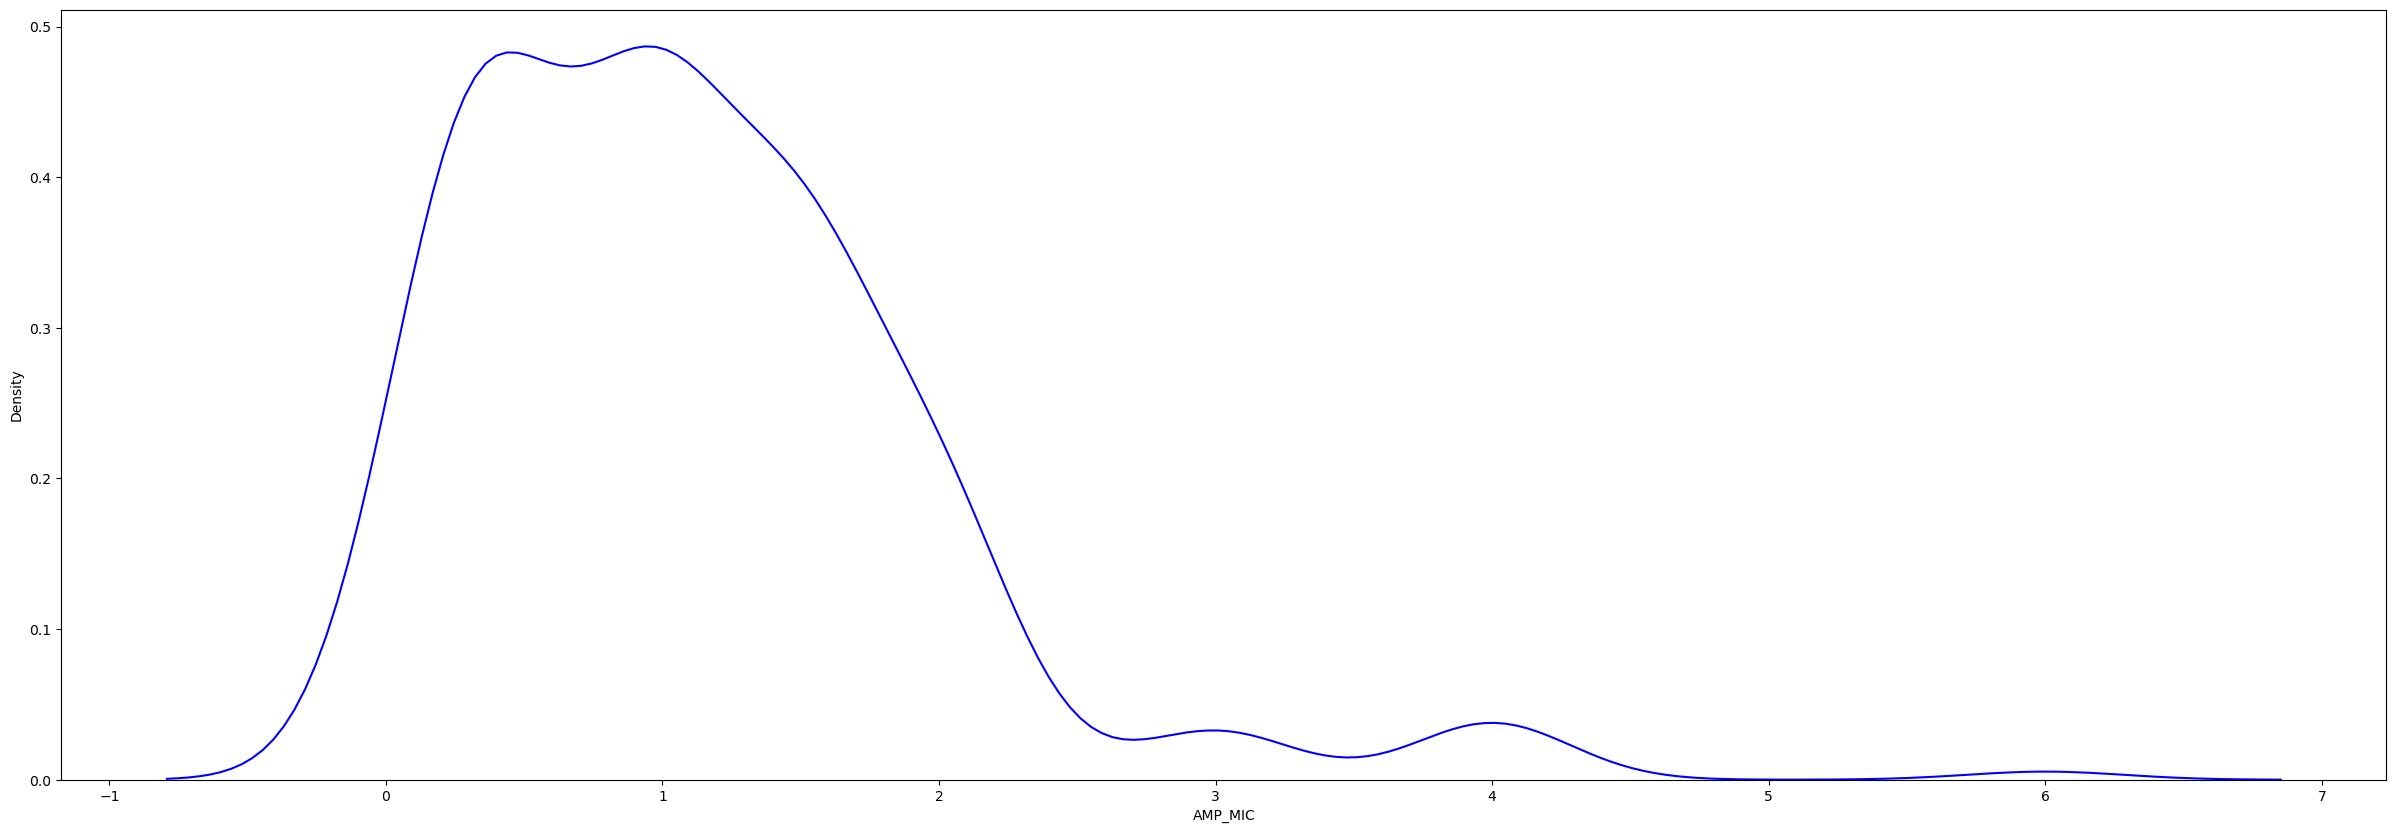

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
sns.kdeplot(data=df_mics, x='AMP_MIC', color='blue', ax=ax)


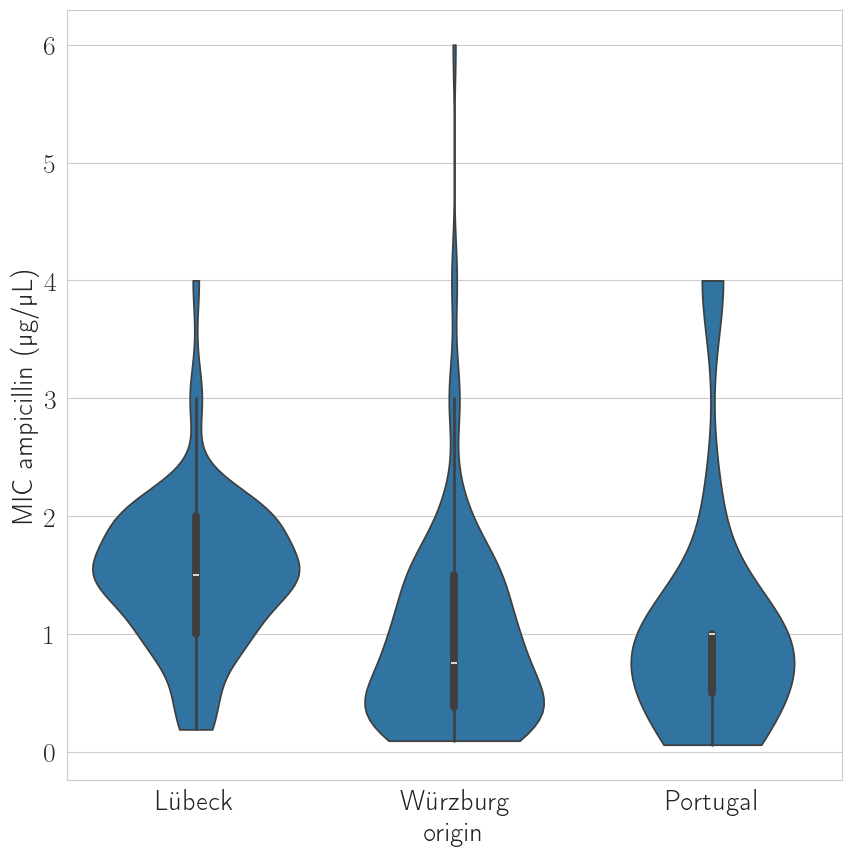

In [31]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "sans-serif",
    "axes.labelsize": 20,               # LaTeX default is 10pt font.
    "font.size": 10,
    "xtick.labelsize": 20,               # a little smaller
    "ytick.labelsize": 20,
    "text.latex.preamble": "\n".join([ # plots will use this preamble
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=DE]{siunitx}",
        ])
    }
mpl.rcParams.update(pgf_with_latex)

df_mics = (pd.read_feather('../results/feather/Hinf_norm_mic.feather')
           .assign(AMP_MIC= lambda df: df['AMP_MIC'].replace('>8','8').astype('float'))
           .assign(etest = lambda df: df['origin'] != 'Portugal')          
          )

df_mics = df_mics.drop(df_mics[df_mics.AMP_MIC > 100].index)
df_mics = df_mics.replace('Wurzburg', 'Würzburg')
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylabel=r'MIC ampicillin (\si{\micro\gram / \micro\litre})')
ax.set_yticks(range(9))
sns.set_style("whitegrid")
sns.violinplot(data= df_mics, x='origin', y='AMP_MIC', cut=0,  ax=ax)#, hue='origin')

fig.savefig('violine.pdf')

In [41]:
import pandas as pd

df_temp = pd.read_feather('results/feather/Hinf_norm_mic.feather')
df_temp[['samples', 'AMP_MIC']].assign(AMP_MIC= lambda df: df['AMP_MIC'].replace('>8','8').astype('float')).query('AMP_MIC < 200').to_csv('../pyseerHinf/mics.pheno', sep='\t', index=False)
# df_temp = pd.read_feather('results/feather/Hinf_norm_bin.feather')
# df_temp[['samples', 'AMP']].assign(AMP= lambda df: df['AMP'].replace(['S','R'],[0,1])).to_csv('../pyseerHinf/resistance.pheno', sep='\t', index=False)

In [ ]:
# ddsds = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
# ddf = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative').to_xarray().rename({"SampleID":"samples"}).swap_dims({'index': 'samples'}).drop(labels='index')
# ddsds = ddsds.set_index({'samples': 'sample_id'})
# ddsds = ddsds.merge(ddf, join="left")
# ddsds
# ds_genotype = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
# ds_genotype = ds_genotype.set_index({"samples": "sample_id", 'variants': 'variant_id'})

# ds_genotype['genotype'] = ds_genotype.call_genotype.max(dim='ploidy')
# df_genotype = ds_genotype.genotype.transpose().to_pandas()

# df_negative = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative', index_col="SampleID")


# df_final = df_genotype.merge(df_negative, how='left', left_index=True, right_index=True)
# df_final

# sg.load_dataset('results/zarrs/Hinf_norm_mic_temp.zarr/').reset_index('samples').reset_coords('samples').rename({'samples': 'sample_id'})
hallo = sg.load_dataset('results/zarrs/Hinf_norm_mic_temp.zarr')
hallo.sel(samples=(hallo.origin=='Wurzburg').compute())['Perc.ReadsMapped']
hallo

In [177]:
import pandas as pd
import sgkit as sg
print(pd.read_feather('results/feather/Hinf_norm_bin_wurzburg.feather').shape)
print(pd.read_feather('results/feather/Hinf_norm_bin_luebeck.feather').shape)
print(pd.read_feather('results/feather/Hinf_norm_bin_portugal.feather').shape)
print(pd.read_feather('results/feather/Hinf_norm_mic_wurzburg.feather').shape)
print(pd.read_feather('results/feather/Hinf_norm_mic_luebeck.feather').shape)
print(pd.read_feather('results/feather/Hinf_norm_mic_portugal.feather').shape)
# ddd = sg.load_dataset('results/zarrs/Hinf_norm_bin_wurzburg_temp.zarr/').set_index({'samples': 'sample_id','variants': 'variant_id'})
# ddd['genotype'] = ddd.call_genotype.max(dim='ploidy')
# df_genotype = ddd.genotype.transpose().to_pandas()
# df_genotype
# pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative', index_col="SampleID")

(144, 122952)
(131, 99532)
(49, 54209)
(144, 122952)
(76, 70234)
(49, 54209)


In [31]:
import sgkit as sg
from sgkit.io.vcf import zarr_to_vcf

zarr_to_vcf('results/zarrs/Hinf_norm_temp.zarr/', 'test/Hinf_norm_temp.vcf')

In [109]:
df_neg = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative')
df_pos = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='excluded_blac_positive')
df_all = pd.concat((df_neg, df_pos))

df_all['beta_lactamase'].value_counts(dropna=False)

beta_lactamase
negativ    334
positiv    181
NaN          1
Name: count, dtype: int64

In [157]:
dds = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
dds = dds.pipe(sg.sample_stats).pipe(lambda ds: ds.sel(samples=(ds.sample_n_het < 10_000).compute()))
mask_hetero = (dds.call_genotype[:,:,0] != dds.call_genotype[:,:,1]).any(dim='samples')
mask_mac = sg.variant_stats(dds).variant_allele_count[:,:2].min(dim='alleles') < 20
(mask_hetero & mask_mac).sum().values


array(6364)

## Create Excels of used isolates

In [318]:
ds_bin = sg.load_dataset('results/zarrs/Hinf_norm_bin_temp.zarr/')
ds_mic = sg.load_dataset('results/zarrs/Hinf_norm_mic_temp.zarr/')
samples_bin = ds_bin.sample_id.to_series()
samples_mic = ds_mic.sample_id.to_series()

df_neg = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative')


with pd.ExcelWriter('isoates.xlsx') as writer:
    
    df_neg[df_neg.SampleID.isin(samples_bin)].to_excel(writer, sheet_name='logistic_regression',index=False)
    df_neg[df_neg.SampleID.isin(samples_mic)].to_excel(writer, sheet_name='linear_regression', index=False)


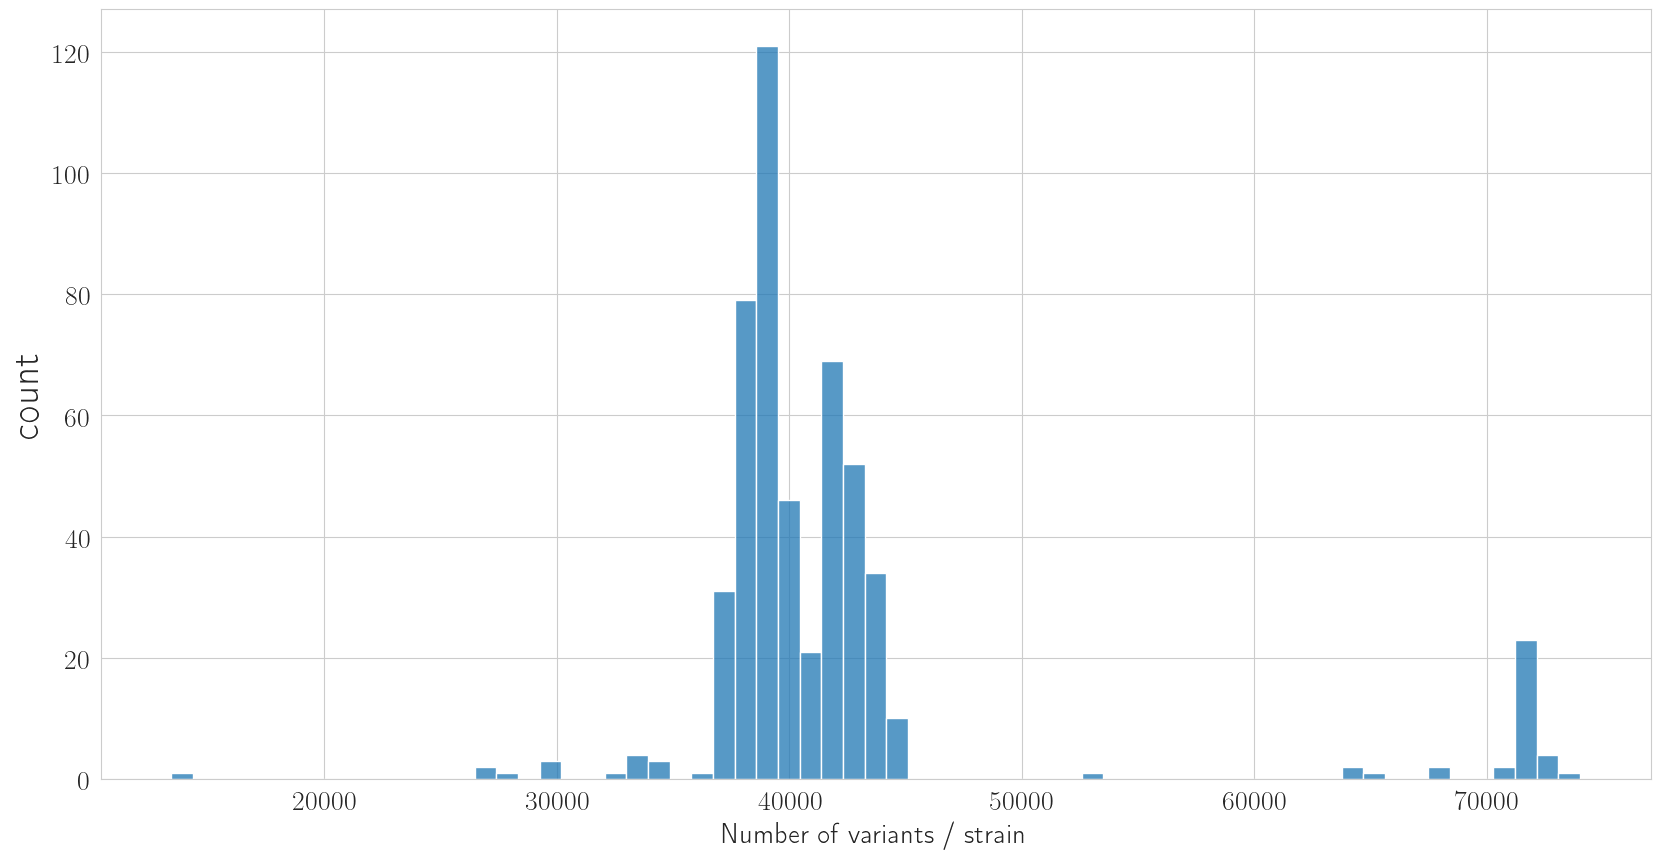

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


df_stats = pd.read_excel('../stats.xlsx')
# df_stats['records'].plot.hist(bins=50)
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Number of variants / strain')
ax.set_ylabel('count', fontsize=30)
sns.histplot(data=df_stats, x='records', ax=ax)

fig.savefig('variant_count.pdf')

In [46]:
df_stats.records.describe()

count      515.000000
mean     42024.194175
std       8334.936228
min      13410.000000
25%      38603.500000
50%      39646.000000
75%      42343.000000
max      74006.000000
Name: records, dtype: float64

In [420]:
df_stats = df_stats.assign(SampleID= df_stats['FullID'].str.split('_').str[0])
df_neg = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative')
df_stats_full = df_neg.merge(df_stats.drop('FullID', axis=1), left_on='SampleID', right_on='SampleID')

# sns.scatterplot(data=df_stats, x='records', y='het1')
df_stats_full.nsmallest(30,'records')
# df_stats_full.serotype.value_counts()

,SampleID,FullID,Perc.ReadsMapped,CoverageMappedReads,origin,AMP,AMP_MIC,serotype,beta_lactamase,records,het1,het2
239,HLR-411,HLR-411_lib48451_nextseq_nx0206_151bp,88.48,187.83,Wurzburg,S,1,NTHi,negativ,13410,126,5
86,HLR-193,HLR-193_lib43839_nextseq_nx0169_151bp,89.21,198.54,Lübeck,S,NaN,NTHi,negativ,26789,872,20
20,HLR-162,HLR-162_lib43808_nextseq_nx0169_151bp,92.08,146.32,Lübeck,R,2,NTHi,negativ,27043,294,6
322,HLR-560,HLR-560_lib48951_nextseq_ny0042_151bp,93.58,126.94,Portugal,R,4,NaN,negativ,29288,401,5
327,HLR-566,HLR-566_lib48957_nextseq_ny0042_151bp,92.61,111.03,Portugal,S,0.25,NaN,negativ,29304,410,5
321,HLR-559,HLR-559_lib48950_nextseq_ny0042_151bp,92.96,140.25,Portugal,S,1,NaN,negativ,29772,480,6
330,HLR-571,HLR-571_lib48463_nextseq_nx0206_151bp,90.86,237.23,Portugal,R,4,NaN,negativ,33385,305,6
311,HLR-541,HLR-541_lib48932_nextseq_ny0042_151bp,85.59,109.70,Portugal,S,0.12,NaN,negativ,33644,370,3
11,HLR-138,HLR-138_lib43656_nextseq_ny0006_151bp,90.88,171.14,Lübeck,S,NaN,NTHi,negativ,33737,784,28
300,HLR-520,HLR-520_lib48450_nextseq_nx0206_151bp,87.34,221.96,Portugal,S,1,NaN,negativ,33948,461,7


In [419]:
df_stats_full.serotype.value_counts(dropna=False)

serotype
NTHi          267
NaN            50
Serotype f     12
Serotype e      3
Serotype b      1
Name: count, dtype: int64

In [33]:
df_stats_full.rolling(4)

Rolling [window=4,center=False,axis=0,method=single]

In [425]:
resistances = [256,192,128,96,64,48,32,24,16,12,8,6,4,3,2,1.5,1,.75,.5,.38,.25,.19,.125,.094,.064,.047,.032,.023]
df_neg = pd.read_excel('metadata_HLR_extern.xlsx', sheet_name='blac_negative')
df_neg[~df_neg.AMP_MIC.isin(resistances)].dropna(subset=['AMP_MIC'])

,SampleID,FullID,Perc.ReadsMapped,CoverageMappedReads,origin,AMP,AMP_MIC,serotype,beta_lactamase
195,HLR-343,HLR-343_lib47007_nextseq_ny0030_151bp,87.47,115.35,Wurzburg,S,0.94,NTHi,negativ
213,HLR-361,HLR-361_lib47082_nextseq_nx0195_151bp,90.08,203.88,Wurzburg,S,0.94,NTHi,negativ
285,HLR-495,HLR-495_lib48456_nextseq_nx0206_151bp,88.33,286.51,Portugal,S,0.5,NaN,negativ
289,HLR-503,HLR-503_lib48433_nextseq_nx0206_151bp,85.61,350.98,Portugal,R,>8,NaN,negativ
290,HLR-506,HLR-506_lib48436_nextseq_nx0206_151bp,88.63,326.65,Portugal,S,0.5,NaN,negativ
292,HLR-509,HLR-509_lib48439_nextseq_nx0206_151bp,87.47,167.46,Portugal,S,0.25,NaN,negativ
297,HLR-516,HLR-516_lib48446_nextseq_nx0206_151bp,90.16,168.81,Portugal,S,0.06,NaN,negativ
299,HLR-518,HLR-518_lib48448_nextseq_nx0206_151bp,92.43,200.76,Portugal,S,0.12,NaN,negativ
300,HLR-519,HLR-519_lib48449_nextseq_nx0206_151bp,92.43,251.58,Portugal,S,0.5,NaN,negativ
302,HLR-521,HLR-521_lib48466_nextseq_nx0206_151bp,91.46,299.09,Portugal,S,0.5,NaN,negativ


In [375]:
ds_mic_hetero = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
# ds_mic_hetero.call_genotype.sum(dim='ploidy').to_series().value_counts()
(ds_mic_hetero
     # .pipe(lambda ds: ds.sel(samples=(ds.sample_id != 'HLR-513').compute()))
     .pipe(sg.variant_stats)
     .pipe(lambda ds: ds.sel(variants=(ds.variant_allele_count[:,:2].min(dim='alleles') >= 20).compute()))
     .variant_n_het.to_series().value_counts()
)

variant_n_het
0      122232
1       18791
2        1132
3         699
4         489
        ...  
130         1
105         1
173         1
178         1
175         1
Name: count, Length: 186, dtype: int64

In [ ]:
ds_mic_hetero = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/')
# ds_mic_hetero.call_genotype.sum(dim='ploidy').to_series().value_counts()
(ds_mic_hetero
     .pipe(lambda ds: ds.sel(samples=(ds.sample_id != 'HLR-513').compute()))
     .pipe(sg.variant_stats)
     .pipe(lambda ds: ds.sel(variants=(ds.variant_allele_count[:,:2].min(dim='alleles') >= 20).compute()))
     # .variant_n_het.to_series().value_counts()
)

In [ ]:
ds_all = sg.load_dataset('results/zarrs/Hinf_norm.zarr/')
x = 1500000
ds_all.sel(variants=((1294836 < ds_all.variant_position) & (ds_all.variant_position < 1327532)).compute())
ds_all.sel(variants=((x < ds_all.variant_position) & (ds_all.variant_position < x + 32696)).compute())
# 1327532 - 1294836

In [ ]:
ds_test = sg.load_dataset('results/zarrs/Hinf_norm_bin_temp.zarr/')
ds_test

In [210]:
import pandas as pd
importm sgkit as sg

gwas_results = pd.read_feather('/Users/lbartels/Desktop/lin_reg_res.feather').drop(['p_values.adj'], axis=1)
ds_mic = sg.load_dataset('results/zarrs/Hinf_norm_mic_temp.zarr/')

gwas_results = gwas_results.sort_values('pvalue')
gwas_results = (gwas_results#.iloc[:-101]
                    .to_xarray()
                    .rename_dims({'index': 'variants'})
                    .assign(variant_id = lambda x : x['pos'].astype(str) + ('_' + x['alt.allele']))
                    .drop(['alt.allele', 'pos'])
                    .reset_index('index')
                    .reset_coords(drop=True)
                    .set_index({'variants': 'variant_id'}))
ds_mic = (ds_mic
              .reset_index('variants')
              .reset_coords(drop=True)
              .assign(variant_id=lambda ds: ( ds.variant_position.to_series().astype(str) + '_' + ds.variant_allele[:,1].to_series()))
              .set_index({'variants': 'variant_id', 'samples': 'sample_id'})
         )

res = ds_mic.merge(gwas_results, join='inner')
res
# res.sel(variants= (res.variant_position == 1688963)).pvalue
genotype = res.call_genotype[:,:,0].to_pandas()

variant_stats = res[['pvalue', 'effect', 'gene.name', 'gene.product', 'gene.type', 'variant_quality']].to_pandas()

big = variant_stats.join(genotype, how='left')#.loc[['1688963_G','1688933_C', '1688990_A', '1689020_G', '1688582_C', '1688876_A', '1688969_C', '1688987_A'],['pvalue', 'HLR-106']]
# variant_stats

In [ ]:
mask = res.call_genotype[:,:,0].loc['1688963_G'] == 1
res.AMP[mask.compute()] == 'S'

test = (res
     .pipe(lambda ds: ds.sel(variants=(ds.variants == '1688963_G')))
     # .pipe(lambda ds: ds.sel(samples=(ds.call_genotype[:,:,0] == 1).compute()))
)



In [11]:
%time

5  + 5

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.9 µs


10

### Create position-to-mutation mapping

In [133]:
%%time
import pandas as pd

csv = pd.read_csv('../2023_haemophilius_gwas/Hflu_association_data_cf4_cr4_fr75_ph8_l0_x0_271_combined_amended_u95_phylo.csv', sep='\t', skiprows=[0], na_values=['-'], nrows=10)

variant_cols = ['#Pos.', 'Ref', 'Gene', 'GeneName', 'Annotation', 'Main_type', 'Main_allel']
strain_cols = csv.columns.to_series().filter(regex='^(HLR)').tolist()

csv = pd.read_csv('../2023_haemophilius_gwas/Hflu_association_data_cf4_cr4_fr75_ph8_l0_x0_271_combined_amended_u95_phylo.csv', sep='\t', skiprows=[0], na_values=['-'], usecols=(variant_cols + strain_cols), low_memory=False)

CPU times: user 36 s, sys: 2min 9s, total: 2min 45s
Wall time: 3min 22s


In [288]:
%%time
df_temp = (csv
            # .drop(columns=['Strains', 'Count_unamb', 'Perc_unamb', 'Ns', 'Us', 'PureSNP', 'Category', 'Resistance', 'Phylo', 'InterestingRegion'])
            .rename(columns={'#Pos.': 'position'})
            .filter(regex='(position)|^(HLR)', axis=1)
     # .query('1688287 < position < 1690121')
     # .assign(combined= lambda df:  df.filter(regex='^(HLR).*(1)$', axis=1).apply(lambda x: x.dropna().drop_duplicates().tolist(), axis=1))
)



alleles_df = (df_temp
        .melt(id_vars=['position'], value_vars=df_temp.columns.to_series().filter(regex='^(HLR).*(bp)$'))
        .set_index(['position', 'variable'])
)

mutations_df = (df_temp
         .melt(id_vars=['position'], value_vars=df_temp.columns.to_series().filter(regex='^(HLR).*(1)$'))
         .assign(variable= lambda x: x['variable'].str.slice(stop=-2))
         .set_index(['position', 'variable'])
)


# mapping = (alleles_df.join(mutations_df, how='inner', lsuffix='_allele', rsuffix='_mutation')
#            .reset_index()
#            .drop_duplicates()
#            .drop(columns=['variable'])
#            .rename(columns={'value_allele' : 'allele', 'value_mutation': 'mutation'})
#            .assign(allele= lambda df: df['allele'].str.upper())
#            .assign(id = lambda df: df['position'].astype(str) + '_' + df['allele'])
#            # .set_index(['id'])
#            # .sort_index()
# )

mapping = (pd.merge(alleles_df, mutations_df, left_index=True, right_index=True)
           .reset_index()
           .drop(columns='variable')
           .rename(columns={'value_x': 'allele', 'value_y' : 'mutation'})
           .assign(allele= lambda df: df['allele'].str.upper())
           .drop_duplicates()
           .dropna(subset='mutation')
           .assign(id = lambda df: df['position'].astype(str) + '_' + df['allele'])
)


mapping

CPU times: user 57.2 s, sys: 46.8 s, total: 1min 44s
Wall time: 1min 56s


,position,allele,mutation,id
5,99,T,D33D (GAC/GAT),99_T
22,165,C,T55T (ACT/ACC),165_C
25,205,A,A69T (GCA/ACA),205_A
32,246,C,V82V (GTT/GTC),246_C
33,249,G,K83K (AAA/AAG),249_G
...,...,...,...,...
48389361,1224709,C,F9F (TTT/TTC),1224709_C
48397837,1343208,A,A220V (GCA/GTA),1343208_A
48416982,1527250,A,T26I (ACC/ATC),1527250_A
48418843,1546588,T,R260H (CGT/CAT),1546588_T


In [289]:
mapping.query('1688287 < position < 1690121')
gwas.query('1688287 < pos < 1690121')

,id,pos,alt.allele,pvalue,effect,r.squared,adj.r.squared,p_values.adj,gene.name,gene.product,gene.type
137645,1688312_A,1688312,A,0.185793,0.161257,0.006724,0.002903,0.533751,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137646,1688314_T,1688314,T,0.004592,-0.611012,0.030483,0.026754,1.836359,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137647,1688315_A,1688315,A,0.022599,0.359296,0.019836,0.016066,1.282242,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137648,1688320_C,1688320,C,0.000867,0.563798,0.041842,0.038156,2.330306,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137649,1688324_C,1688324,C,0.001319,0.620187,0.038972,0.035275,2.197318,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
...,...,...,...,...,...,...,...,...,...,...,...
137833,1690057_T,1690057,T,0.000456,0.483242,0.046242,0.042574,2.510256,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137834,1690058_A,1690058,A,0.000019,-0.772955,0.068001,0.064416,3.441155,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137835,1690082_C,1690082,C,0.016471,-0.444921,0.021921,0.018160,1.393571,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS
137836,1690102_G,1690102,G,0.016471,-0.444921,0.021921,0.018160,1.393571,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS


In [347]:
def position2mutation(pos, allele, mapping):
    try:
        mutation = mapping.loc[(pos,allele),'mutation'].item()
    except KeyError:
        mutation = 'NaN'
    return mutation

def position2mutation2(pos, allele, mapping):
    mutation = mapping.loc[(pos,allele),'mutation']
    return mutation

# position2mutation2(gwas['pos'], gwas['alt.allele'], mapping)
# mapping.loc[(gwas['pos'], gwas['alt.allele'])]
# mapping.loc['1688990_A']
csv.rename(columns={'#Pos.' : 'position'}).query('position == 5')#.filter(regex='^(HLR).*(bp)$')
# csv.columns[:30]

,position,Ref,Gene,GeneName,Annotation,Main_type,Main_allel,HLR-103_lib43361_nextseq_ny0004_151bp,HLR-106_lib43364_nextseq_ny0004_151bp,HLR-109_lib43540_nextseq_ny0006_151bp,...,HLR-561_lib48952_nextseq_ny0042_151bp.1,HLR-562_lib48953_nextseq_ny0042_151bp.1,HLR-563_lib48954_nextseq_ny0042_151bp.1,HLR-565_lib48956_nextseq_ny0042_151bp.1,HLR-566_lib48957_nextseq_ny0042_151bp.1,HLR-568_lib48460_nextseq_nx0206_151bp.1,HLR-569_lib48461_nextseq_nx0206_151bp.1,HLR-571_lib48463_nextseq_nx0206_151bp.1,HLR-572_lib48464_nextseq_nx0206_151bp.1,HLR-573_lib48465_nextseq_nx0206_151bp.1


In [410]:
%%time
import pyreadr

gwas = pyreadr.read_r('/Users/lbartels/20231023-linreg_below8_mac10_maximumsetting.rds')
gwas = gwas[None]#.set_index('id')
# gwas['mutation'] = position2mutation(gwas['pos'], gwas['alt.allele'], mapping)
# gwas.mutation.value_counts()
# gwas.join(mapping, on='id', how='left').drop(columns=['position', 'allele'])
# gwas.join(mapping.set_index('id'), on='id', how='left').drop(columns=['position', 'allele'])
dfdf = pd.merge(gwas, mapping, how='left', on='id', validate='one_to_one').drop(columns=['position', 'gene.name', 'gene.product', 'gene.type'])
# dfdf.query('1688287 < pos < 1690121').sort_values('pvalue')[:60]
dd = dfdf.dropna(subset='allele')

dfdf.sort_values('pvalue')

CPU times: user 682 ms, sys: 43 ms, total: 725 ms
Wall time: 726 ms


,id,pos,alt.allele,pvalue,effect,r.squared,adj.r.squared,p_values.adj,allele,mutation
137700,1688582_C,1688582,C,1.952200e-22,1.096335,3.064106e-01,0.303743,16.541070,C,T513T (ACA/ACG)
137740,1688876_A,1688876,A,2.308731e-18,1.008978,2.550391e-01,0.252174,12.769250,A,G415G (GGA/GGT)
137745,1688933_C,1688933,C,1.421752e-17,1.035333,2.446663e-01,0.241761,12.280830,C,L396L (TTA/TTG)
137748,1688963_G,1688963,G,1.421752e-17,1.035333,2.446663e-01,0.241761,12.280830,G,R386R (CGT/CGC)
137752,1688990_A,1688990,A,6.023248e-17,1.031904,2.363299e-01,0.233393,11.750733,A,M377I (ATG/ATT)
...,...,...,...,...,...,...,...,...,...,...
126582,1570171_T,1570171,T,9.998628e-01,0.000022,1.140104e-10,-0.003846,0.000048,T,F18F (TTC/TTT)
25243,308407_A,308407,A,9.998713e-01,0.000020,1.002541e-10,-0.003846,0.000047,A,P204P (CCC/CCT)
146338,1826029_G,1826029,G,9.999152e-01,0.000020,4.348164e-11,-0.003846,0.000031,NaN,NaN
114758,1434508_G,1434508,G,9.999409e-01,0.000009,2.115147e-11,-0.003846,0.000023,G,R836R (CGT/CGC)


In [343]:
import sgkit as sg

ds = sg.load_dataset('results/zarrs/Hinf_norm_mic_temp.zarr/')
# ds.sel(variants= (ds.variant_position == 1688482)).variant_allele.values#.pipe(sg.variant_stats).variant_n_non_ref.values
# ds.sel(variants= ((1688287 < ds.variant_position ) &  (ds.variant_position < 1690121)).compute())

ds = ds.reset_index('variants').reset_coords('variants').set_index({'variants': 'variant_id'}).set_coords({'variants': 'variant_id'})
# ds_gwas = gwas.to_xarray().reset_index('index').reset_coords('index').rename_dims({'index' : 'variants'}).rename_vars({'id': 'variant_id'}).set_coords('variant_id').set_index({'variants' : 'variant_id'})
ds_gwas = dfdf.to_xarray().reset_index('index').reset_coords('index').rename_dims({'index' : 'variants'}).rename_vars({'id': 'variant_id'}).set_coords('variant_id').set_index({'variants' : 'variant_id'}).drop_vars('index')
ds_final = ds_gwas.merge(ds, join='left')

In [358]:
a = ds_final.sel(variants= ((1688287 <= ds.variant_position ) &  (ds.variant_position <= 1690121)).compute())[[ 'pvalue', 'effect', 'variant_position', 'mutation']].to_dataframe().sort_values('pvalue')[:60]['variant_position']
b = dfdf.query('1688287 < pos < 1690121').sort_values('pvalue')[:60]['pos']

# c = ds_final['allele'].to_series().str.split('_').apply(lambda x: x[1]).values
# d = ds_final.variant_allele[:,1].values
# (c == d).all()
e = ds_final.dropna(dim='variants', subset=['alt.allele'])['variants'].to_series().str.split('_').apply(lambda x: x[1]).values
f = ds_final.dropna(dim='variants', subset=['alt.allele'])['alt.allele']
(e == f).all()

<xarray.DataArray 'alt.allele' ()>
array(True)

In [517]:
baba = ds_final.squeeze('ploidy')[['pvalue', 'variant_position', 'adj.r.squared', 'mutation']].to_pandas().sort_values('pvalue')
baba.query('(1688288 < variant_position < 1690120) & (mutation.str.contains("N526K"))')

,pvalue,variant_position,adj.r.squared,mutation
variants,,,,
1688543_T,6.118862e-14,1688543,0.192034,N526K (AAT/AAA)
1688543_C,1.726538e-02,1688543,0.017847,N526K (AAT/AAG)


In [76]:
sel = pd.Series(('60_G', '5_C'))
sel2 = pd.Series((60,5))
prop = pd.concat((sel,sel2), axis=1)
# gwas.set_index(['id','pos']).loc[prop]
# mapping['index'] =
mapping.reset_index()['position'].astype(str) + '_' + mapping.reset_index()['allele']
mapping = (mapping.reset_index()
        .assign(haha = lambda df: df['position'].astype(str) + '_' + df['allele'])
)

In [172]:
# test[test.position == 1688312].combined.apply(len).value_counts()
# test.query('1688287 < position < 1690121').combined.astype(str).str.contains('R517H')
test.columns[:30]

Index(['position', 'Ref', 'Gene', 'GeneName', 'Annotation', 'Main_type',
       'Main_allel', 'Type', 'Allel', 'CovFor', 'CovRev', 'Qual20', 'Freq',
       'Cov', 'Subst.', 'Type.1', 'Allel.1', 'CovFor.1', 'CovRev.1',
       'Qual20.1', 'Freq.1', 'Cov.1', 'Subst..1', 'Type.2', 'Allel.2',
       'CovFor.2', 'CovRev.2', 'Qual20.2', 'Freq.2', 'Cov.2'],
      dtype='object')

In [499]:
genes = pd.read_csv('vcf_Haemophilus/annotation_files/Hinf_Rd-KW20v3_DSM11121_2023-06-15_genes_adjst.txt', sep='\t', na_values=['-']).drop(columns=['Unnamed: 0']).rename({'# ID': 'ID'}, axis=1)
genes[genes.name.str.contains('ftsI')]

,ID,name,start,stop,frame,product,description,function,cogcats,status_region,status_function,type,region_number,function_number,start_adjst,end_adjst
1704,Rd_08430c,ftsI CDS,1690120,1688288,NaN,Peptidoglycan D%2CD-transpeptidase FtsI,NaN,NaN,NaN,NaN,NaN,CDS,NaN,NaN,1688288,1690120


In [ ]:
import xarray as xr
ds_new = sg.load_dataset('results/zarrs/Hinf_norm_mic.zarr/').drop_vars(['call_genotype_mask', 'call_genotype_phased', 'variant_id_mask']).assign(call_genotype = lambda ds: ds.call_genotype.max(dim='ploidy'))
ds_new['call_genotype'] = ds_new.call_genotype.expand_dims({'ploidy':1},2)
ds_new['call_genotype_mask'] = xr.zeros_like(ds_new.call_genotype).astype(bool)
# ds_new.assign(call_genotype = ds_new.call_genotype.max(dim='ploidy')).drop_vars(['call_genotype_mask', 'call_genotype_phased', 'variant_id_mask'])
# ds_new.call_genotype.max(dim='ploidy')
# ds_new.call_genotype.max(dim='ploidy').expand_dims({'ploidy':1},2)
sg.variant_stats(ds_new).pipe( lambda ds: ds.sel(variants=(ds.variant_allele_count[:,:2].min(dim='alleles') >= 10).compute()))
# ds_new.call_genotype
# ds_new


## PCA plot

In [30]:
import pandas as pd
df_feather = pd.read_feather('../results/feather/Hinf_norm_bin.feather')
df_feather

,samples,ID_5_C,ID_34_C,ID_60_G,ID_63_T,ID_84_A,ID_101_C,ID_102_A,ID_105_A,ID_106_T,...,ID_1830686_T,ID_1830689_C,FullID,Perc.ReadsMapped,CoverageMappedReads,origin,AMP,AMP_MIC,serotype,beta_lactamase
0,HLR-106,1,0,0,0,0,0,0,0,0,...,0,0,HLR-106_lib43364_nextseq_ny0004_151bp,86.60,374.56,Lübeck,S,1.0,NTHi,negativ
1,HLR-109,0,0,0,0,0,0,0,0,0,...,0,0,HLR-109_lib43540_nextseq_ny0006_151bp,85.13,539.46,Lübeck,S,0.38,NTHi,negativ
2,HLR-10,0,0,0,0,0,0,1,1,1,...,0,1,HLR-10_lib43073_nextseq_nx0150_151bp,91.76,325.95,Lübeck,S,1.0,NTHi,negativ
3,HLR-110,0,0,0,0,0,0,0,0,0,...,0,1,HLR-110_lib43541_nextseq_ny0006_151bp,91.40,253.65,Lübeck,R,2.0,NTHi,negativ
4,HLR-111,1,0,0,0,0,0,1,1,1,...,0,0,HLR-111_lib43542_nextseq_ny0006_151bp,91.88,232.68,Lübeck,R,1.5,NTHi,negativ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,HLR-568,0,0,0,0,0,0,1,1,1,...,0,1,HLR-568_lib48460_nextseq_nx0206_151bp,90.13,205.11,Portugal,S,1.0,NTHi,negativ
318,HLR-569,0,0,0,0,0,0,1,1,1,...,0,1,HLR-569_lib48461_nextseq_nx0206_151bp,87.00,209.37,Portugal,S,0.5,NTHi,negativ
319,HLR-571,1,0,0,0,0,0,1,1,1,...,1,1,HLR-571_lib48463_nextseq_nx0206_151bp,90.86,237.23,Portugal,R,4.0,Serotype b,negativ
320,HLR-572,0,0,0,0,0,0,0,0,0,...,0,0,HLR-572_lib48464_nextseq_nx0206_151bp,88.27,280.74,Portugal,R,4.0,NTHi,negativ


In [32]:
from sklearn.decomposition import PCA
import re
from bokeh.plotting import figure, show, output_notebook, output_file, ColumnDataSource, save
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import export_svg

df_feather.loc[:,[True if re.search('[0-9]',column) else False for column in df_feather.columns]]
X = df_feather.filter(regex=("[0-9]"), axis=1).values

pca = PCA(n_components=4)
X_trns = pca.fit_transform(X)

# sns.scatterplot(x=X_trns[:,0], y=X_trns[:,1])

data = df_feather[['samples', 'origin', 'AMP', 'AMP_MIC', 'serotype', 'beta_lactamase']]
data['PC1'] = X_trns[:,0]
data['PC2'] = X_trns[:,1]
source = data#ColumnDataSource(data)

SEROTYPES = sorted(data.serotype.unique())
MARKERS = ['hex', 'circle_x', 'triangle', 'square']
ORIGINS = sorted(data.origin.unique())

TOOLTIPS = [
    ("sample", "@samples"),
    ("origin", "@origin"),
    ("AMP", "@AMP"),
    ("MIC", "@AMP_MIC")
]

# output_notebook()
p = figure(title='PCA', tooltips=TOOLTIPS)
# p.output_backend = "svg"


# p.scatter('PC1', 'PC2', source=source, legend_group='serotype', fill_alpha=0.4, size=20,
#            color=factor_cmap('serotype', 'Category10_3', SEROTYPES))

p.circle('PC1', 'PC2', source=source, legend_group='serotype', fill_alpha=0.4, size=10,
           color=factor_cmap('serotype', 'Category10_5', SEROTYPES))

pca_explained_ratios = pca.explained_variance_ratio_ * 100

p.xaxis.axis_label = f"PC1 ({pca_explained_ratios[0]:.2f}%)"
p.yaxis.axis_label = f"PC2 ({pca_explained_ratios[1]:.2f}%)"
p.legend.location = 'top_right'
# show(p)

output_file(filename="pca_plot_serotpyes_bin.html", title="PCA on linear regression dataset")
save(p)
# export_svg(p, filename="PCA.svg")

/var/folders/nz/xcg6fxln5r9cgfczkxrxx0p00000gn/T/ipykernel_2262/4127874973.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PC1'] = X_trns[:,0]
/var/folders/nz/xcg6fxln5r9cgfczkxrxx0p00000gn/T/ipykernel_2262/4127874973.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PC2'] = X_trns[:,1]


'/Users/lbartels/Documents/2023_haemophilius_gwas/hinf/notebooks/pca_plot_serotpyes_bin.html'

## Manhattan Linear regression

In [46]:
ds_linreg = (sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
             .assign(MAC= lambda ds: ds.pipe(sg.variant_stats).variant_allele_count[:,:2].min(dim='alleles'))
)
df_linreg = ds_linreg[['variant_position', 'pvalue', 'p_values.adj', 'effect',
                       'r.squared', 'adj.r.squared', 'mutation', 'gene.name',
                       'gene.product', 'gene.type', 'MAC']].to_pandas()
df_linreg['-log_10(pvalue)'] = - np.log10(ds_linreg['pvalue'])

ref = df_linreg['mutation'].str.split().str[0].str[0]
alt = df_linreg['mutation'].str.split().str[0].str[-1]
df_linreg['mutation_type'] = ((df_linreg['mutation'] == '') | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')

In [47]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, max_MAC: int) -> pd.DataFrame:
    return dataframe.query("@max_MAC <= MAC")

hover_data = ['pvalue', 'p_values.adj', 'effect', 'r.squared', 'adj.r.squared',
              'mutation', 'gene.name','gene.product', 'gene.type', 'MAC']
fig = px.scatter(df_linreg.pipe(filter_MAC, 10), x='variant_position', y='-log_10(pvalue)', color='mutation_type',
                 hover_data=hover_data)
plotly.offline.plot(fig, filename='../test/manhattan_linreg.html')
# fig.show()

'../test/manhattan_linreg.html'

In [567]:
ds_linreg.pvalue.to_series().sort_values()

variants
1688582_C    1.952200e-22
1688876_A    2.308731e-18
1688933_C    1.421752e-17
1688963_G    1.421752e-17
1688990_A    6.023248e-17
                 ...     
1570180_T    9.998628e-01
1570174_C    9.998628e-01
1570184_T    9.998628e-01
308407_A     9.998713e-01
1434508_G    9.999409e-01
Name: pvalue, Length: 109140, dtype: float64

## Manhattan logistic regression 

In [35]:
ds_logreg = (sg.load_dataset('../results/zarrs/Hinf_norm_bin_logreg_results.zarr/')
             .assign(MAC= lambda ds: ds.pipe(sg.variant_stats).variant_allele_count[:,:2].min(dim='alleles'))
)

df_logreg = ds_logreg[['variant_position', 'pvalue', 'p_values.adj', 'effect',
                        'mutation', 'gene.name',
                       'gene.product', 'gene.type', 'MAC']].to_pandas()
df_logreg['-log_10(pvalue)'] = - np.log10(ds_logreg['pvalue'])

ref = df_logreg['mutation'].str.split().str[0].str[0]
alt = df_logreg['mutation'].str.split().str[0].str[-1]
df_logreg['mutation_type'] = ((df_logreg['mutation'] == '') | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')

In [36]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, max_MAC: int) -> pd.DataFrame:
    return dataframe.query("@max_MAC <= MAC")

hover_data = ['pvalue', 'p_values.adj', 'effect',
              'mutation', 'gene.name','gene.product', 'gene.type', 'MAC']
fig2 = px.scatter(df_linreg.pipe(filter_MAC, 5), x='variant_position', y='-log_10(pvalue)', color='mutation_type',
                 hover_data=hover_data, width=1000)
# plotly.offline.plot(fig2, filename='test2.html')
# fig2.show()
plotly.io.write_image(fig2, '../test/manhattan_logreg.pdf', format='pdf')


In [16]:
ds_logreg = sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
ds_logreg.sel(samples=(ds_logreg.sample_id.isin(('HLR-75', 'HLR-186', 'HLR-50', 'HLR-51', 'HLR-198', 'HLR-161', 'HLR-240', 'HLR-489', 'HLR-380', 'HLR-557'))).compute()).AMP_MIC.values

array([1.5, 1.5, 2. , 2. , 6. , 4. ])

In [72]:
mrdA_strains = ['HLR-161', 'HLR-178', 'HLR-186', 'HLR-198', 'HLR-240', 'HLR-380', 'HLR-489', 'HLR-50', 'HLR-51', 'HLR-520', 'HLR-541', 'HLR-557', 'HLR-567', 'HLR-571', 'HLR-75']
ds_logreg.sel(samples=(ds_logreg.sample_id.isin(mrdA_strains)).compute()).AMP_MIC.values

array([1.5 , 1.5 , 2.  , 2.  , 6.  , 4.  , 1.  , 0.12, 4.  ])

In [93]:

ds_logreg.sel(samples=(ds_logreg.sample_id == 'HLR-75').compute()).AMP_MIC.values

array([2.])

In [ ]:
ds_mic = sg.load_dataset('../results/zarrs/Hinf_norm_mic_temp.zarr/').set_index({'variants': 'variant_id'})
# (ds_mic.call_genotype.loc['ID_1024336_G'] == 1).compute().squeeze()
ds_mic.sel(samples=(ds_mic.call_genotype.loc['ID_1024336_G'] == 1).compute().squeeze())

In [23]:
lin_reg = pd.read_csv('../results/regression/linear_regression.csv', index_col='Unnamed: 0')
lin_reg.sort_values('pvalue')
# lin_reg[lin_reg.id == 'ID_1688582_C']

,id,pos,alt.allele,pvalue,effect,r.squared,adj.r.squared,gene.name,gene.product,gene.type,p_values.adj
181757,ID_1688963_G,1688963,G,3.442511e-13,0.801264,1.845318e-01,0.181395,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS,3.365571e-08
181752,ID_1688933_C,1688933,C,3.442511e-13,0.801264,1.845318e-01,0.181395,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS,3.365571e-08
181699,ID_1688582_C,1688582,C,9.295463e-13,0.745438,1.783799e-01,0.175220,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS,4.750438e-08
181763,ID_1688990_A,1688990,A,1.102460e-12,0.796535,1.773191e-01,0.174155,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS,4.750438e-08
181745,ID_1688876_A,1688876,A,1.385861e-12,0.746710,1.758946e-01,0.172725,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,CDS,4.750438e-08
...,...,...,...,...,...,...,...,...,...,...,...
154498,ID_1458853_C,1458853,C,9.998330e-01,0.000025,1.687498e-10,-0.003846,putP CDS,sodium/proline symporter PutP,CDS,9.998515e-01
103053,ID_961001_A,961001,A,9.998361e-01,-0.000030,1.625260e-10,-0.003846,thrA CDS,bifunctional aspartate kinase/homoserine dehyd...,CDS,9.998515e-01
38154,ID_351851_C,351851,C,9.998798e-01,-0.000021,8.742922e-11,-0.003846,TonB-dependent hemoglobin/transferrin/lactofer...,TonB-dependent hemoglobin/transferrin/lactofer...,CDS,9.998900e-01
55897,ID_516196_C,516196,C,9.999369e-01,-0.000040,2.408441e-11,-0.003846,deoD CDS,purine-nucleoside phosphorylase,CDS,9.999420e-01


[ 2.5849625   2.          1.5849625   1.          0.5849625   0.
 -0.4150375  -1.         -1.39592868 -2.         -2.39592868 -3.
 -3.41119543 -3.96578428 -4.41119543 -4.96578428 -5.44222233]


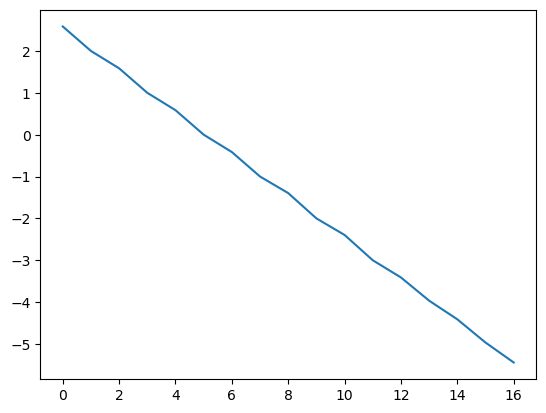

In [52]:
import matplotlib.pyplot as plt
# resistances = np.array([256,192,128,96,64,48,32,24,16,12,8,6,4,3,2,1.5,1,.75,.5,.38,.25,.19,.125,.094,.064,.047,.032,.023])
resistances = np.array([6,4,3,2,1.5,1,.75,.5,.38,.25,.19,.125,.094,.064,.047,.032,.023])

log = np.log2(resistances)
print(log)
plt.plot(log)

In [ ]:
dsds = sg.load_dataset("../results/zarrs/Hinf_norm_mic_temp.zarr/")

def filter_minimum_AC(ds: xr.Dataset, minimum_AC: int = 20) -> xr.Dataset:

    variables_to_drop = ['variant_n_called', 'variant_call_rate',
                          'variant_n_het', 'variant_n_hom_ref', 'variant_n_hom_alt', 'variant_n_non_ref',
                          'variant_allele_count', 'variant_allele_total', 'variant_allele_frequency']

    return(
        ds
        .pipe(sg.variant_stats)
        # .pipe(sg.sample_stats)
        .pipe(lambda ds: ds.sel(variants=(ds.variant_allele_count[:,:2].min(dim='alleles') >= minimum_AC).compute()))
        .drop(variables_to_drop)
        )

dsds.pipe(filter_minimum_AC, 10)

## Statistics of 

In [28]:
ds_results_linreg = sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_results.zarr/')
df_results_linreg = pd.read_csv('../results/linreg.csv', sep='\t', index_col='variants')

resistance_groups = ['M377I', 'S385', 'L389', 'I449', 'A502', 'R517', 'N526']

df_results_linreg_ftsI = (df_results_linreg
                          .query('1688287 < variant_position < 1690121')
                          .assign(mutation_type= lambda df: ((df['mutation'] == '') | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous'))
                          .sort_values('pvalue')
)

In [39]:
df_results_linreg_ftsI[df_results_linreg_ftsI['mutation'].str.startswith(tuple(resistance_groups), na=False)]


,variant_position,variant_quality,pvalue,p_values.adj,mutation,r.squared,adj.r.squared,effect,gene.name,gene.product,...,HLR-561,HLR-562,HLR-563,HLR-565,HLR-566,HLR-568,HLR-569,HLR-571,HLR-572,HLR-573
variants,,,,,,,,,,,,,,,,,,,,,
ID_1688990_A,1688990,19487.80,1.102460e-12,4.750438e-08,M377I (ATG/ATT),0.177319,0.174155,0.796535,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688543_T,1688543,22480.80,1.838780e-08,1.198456e-04,N526K (AAT/AAA),0.114845,0.111441,0.614074,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688616_A,1688616,15720.80,1.461772e-07,3.808508e-04,A502V (GCA/GTA),0.101032,0.097574,0.567024,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688954_C,1688954,21914.80,4.335200e-06,1.354092e-03,L389L (TTA/TTG),0.078129,0.074583,0.484216,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,1,0,0,0,0,1,0,0,0
ID_1688967_G,1688967,12481.80,9.592809e-06,1.803490e-03,S385T (AGT/ACT),0.072714,0.069148,1.355598,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688954_A,1688954,21914.80,1.858231e-04,6.846428e-03,L389F (TTA/TTT),0.052408,0.048763,1.323686,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688966_G,1688966,11516.80,7.693605e-03,5.005925e-02,S385S (AGT/AGC),0.027002,0.023260,0.548028,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688774_T,1688774,10653.80,9.793954e-03,5.806409e-02,I449I (ATT/ATA),0.025383,0.021635,0.460906,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688571_T,1688571,12129.80,2.300087e-02,9.197717e-02,R517H (CGT/CAT),0.019720,0.015949,0.811967,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_results_linreg.head(50)

,variant_position,variant_quality,pvalue,p_values.adj,mutation,r.squared,adj.r.squared,effect,gene.name,gene.product,...,HLR-561,HLR-562,HLR-563,HLR-565,HLR-566,HLR-568,HLR-569,HLR-571,HLR-572,HLR-573
variants,,,,,,,,,,,,,,,,,,,,,
ID_1688963_G,1688963,21542.80,3.442511e-13,3.365571e-08,R386R (CGT/CGC),0.184532,0.181395,0.801264,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688933_C,1688933,21468.80,3.442511e-13,3.365571e-08,L396L (TTA/TTG),0.184532,0.181395,0.801264,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688582_C,1688582,17172.80,9.295463e-13,4.750438e-08,T513T (ACA/ACG),0.178380,0.175220,0.745438,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,1,0,0,0,0,1,0,0,0
ID_1688990_A,1688990,19487.80,1.102460e-12,4.750438e-08,M377I (ATG/ATT),0.177319,0.174155,0.796535,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688876_A,1688876,21891.80,1.385861e-12,4.750438e-08,G415G (GGA/GGT),0.175895,0.172725,0.746710,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1689020_G,1689020,19787.80,1.457711e-12,4.750438e-08,R367R (CGT/CGC),0.175580,0.172409,0.795589,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688987_A,1688987,19808.80,3.015059e-12,7.369182e-08,N378N (AAC/AAT),0.171038,0.167850,0.779454,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1688969_C,1688969,21813.80,3.015059e-12,7.369182e-08,V384V (GTA/GTG),0.171038,0.167850,0.779454,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0
ID_1689017_T,1689017,19397.80,3.987867e-12,7.797476e-08,A368A (GCT/GCA),0.169285,0.166089,0.778279,ftsI CDS,Peptidoglycan D%2CD-transpeptidase FtsI,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_results_linreg.query('100660 < variant_position < 113740')#['gene.name'].unique()

,variant_position,variant_quality,pvalue,p_values.adj,mutation,r.squared,adj.r.squared,effect,gene.name,gene.product,...,HLR-561,HLR-562,HLR-563,HLR-565,HLR-566,HLR-568,HLR-569,HLR-571,HLR-572,HLR-573
variants,,,,,,,,,,,,,,,,,,,,,
ID_113628_A,113628,25225.8,0.000003,0.001202,H228H (CAC/CAT),8.173075e-02,0.078199,0.495468,glyA CDS,Serine hydroxymethyltransferase,...,0,1,1,0,0,0,0,1,1,0
ID_102998_G,102998,22217.8,0.000005,0.001425,T359A (ACA/GCA),7.714305e-02,0.073594,0.480687,emrA CDS,Multidrug export protein EmrA,...,1,0,0,0,0,0,0,1,0,0
ID_111783_T,111783,27742.8,0.000006,0.001425,A86T (GCT/ACT),7.550706e-02,0.071951,0.698602,rhlB CDS,ATP-dependent RNA helicase RhlB,...,0,0,0,0,0,0,0,0,0,0
ID_107415_C,107415,27262.8,0.000008,0.001637,A442A (GCA/GCG),7.364840e-02,0.070086,0.588510,acrB CDS,Uncharacterized transporter,...,0,0,1,0,0,1,0,0,0,0
ID_113658_A,113658,24727.8,0.000016,0.002281,P218P (CCG/CCT),6.927728e-02,0.065698,0.456161,glyA CDS,Serine hydroxymethyltransferase,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_101339_T,101339,10716.8,0.996464,0.997695,A27A (GCA/GCT),7.569821e-08,-0.003846,0.001739,folA CDS,type 3 dihydrofolate reductase,...,0,0,0,0,0,0,0,0,0,0
ID_101704_A,101704,11643.8,0.996843,0.997695,R149H (CGC/CAC),6.032385e-08,-0.003846,0.001733,folA CDS,type 3 dihydrofolate reductase,...,0,0,0,0,0,0,0,0,0,0
ID_101249_AG,101249,25753.7,0.996843,0.997695,NaN,6.032385e-08,-0.003846,0.001733,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Figures usw fuer paper

### Linear regression

In [8]:
import numpy as np

ds_linreg_log2 = (sg.load_dataset('../results/zarrs/Hinf_norm_mic_linreg_logscaled_results.zarr/')
             .assign(MAC= lambda ds: ds.pipe(sg.variant_stats).variant_allele_count[:,:2].min(dim='alleles'))
)

# ds_linreg_log2 = (sg.load_dataset('../../results_temp2/zarrs/Hinf_norm_mic_linreg_results.zarr/')
#              .assign(MAC= lambda ds: ds.pipe(sg.variant_stats).variant_allele_count[:,:2].min(dim='alleles'))
# )

df_linreg_log2 = ds_linreg_log2[['variant_position', 'pvalue', 'p_values.adj', 'effect',
                       'r.squared', 'adj.r.squared', 'mutation', 'gene.name',
                       'gene.product', 'gene.type', 'MAC']].to_pandas()
df_linreg_log2['-log_10(pvalue)'] = - np.log10(df_linreg_log2['pvalue'])

ref = df_linreg_log2['mutation'].str.split().str[0].str[0]
alt = df_linreg_log2['mutation'].str.split().str[0].str[-1]
df_linreg_log2['mutation_type'] = ((df_linreg_log2['mutation'] == '') | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')

In [36]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, min_MAC: int) -> pd.DataFrame:
    return dataframe.query("@min_MAC <= MAC")

def filter_pvalue(dataframe: pd.DataFrame, min_pvalue: float) -> pd.DataFrame:
    return dataframe.query('@min_pvalue > pvalue')

def filter_mutation_type(dataframe: pd.DataFrame) -> pd.DataFrame:
    return dataframe.query("mutation_type == 'nonsynonymous'")
    

hover_data = ['pvalue', 'p_values.adj', 'effect', 'r.squared', 'adj.r.squared',
              'mutation', 'gene.name','gene.product', 'gene.type', 'MAC']

fig = px.scatter(df_linreg_log2.pipe(filter_MAC, 10), x='variant_position', y='-log_10(pvalue)', color='mutation_type',
                 hover_data=hover_data)
fig.update_layout(title='manhattan_ling_reg_log2')
plotly.offline.plot(fig, filename='../test/manhattan_linreg_log2.html')

'../test/manhattan_linreg_log2.html'

#### Static plot for paper

### Logistic regression

In [9]:
ds_logreg = (sg.load_dataset('../results/zarrs/Hinf_norm_bin_logreg_results.zarr/')
             .assign(MAC= lambda ds: ds.pipe(sg.variant_stats).variant_allele_count[:,:2].min(dim='alleles'))
)

df_logreg = ds_logreg[['variant_position', 'pvalue', 'p_values.adj', 'effect',
                        'mutation', 'gene.name',
                       'gene.product', 'gene.type', 'MAC']].to_pandas()
df_logreg['-log_10(pvalue)'] = - np.log10(ds_logreg['pvalue'])

ref = df_logreg['mutation'].str.split().str[0].str[0]
alt = df_logreg['mutation'].str.split().str[0].str[-1]
df_logreg['mutation_type'] = ((df_logreg['mutation'] == '') | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')

In [35]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, max_MAC: int) -> pd.DataFrame:
    return dataframe.query("@max_MAC <= MAC")

hover_data = ['pvalue', 'p_values.adj', 'effect',
              'mutation', 'gene.name','gene.product', 'gene.type', 'MAC']
fig2 = px.scatter(df_logreg.pipe(filter_MAC, 10), x='variant_position', y='-log_10(pvalue)', color='mutation_type',
                 hover_data=hover_data)
# plotly.offline.plot(fig2, filename='test2.html')
# fig2.show()
fig2.update_layout(title='manhattan_logreg')
plotly.offline.plot(fig2, filename='../test/manhattan_logreg.html')

'../test/manhattan_logreg.html'

## Proteins with nonsynonymous mutations below a certain p-value threshold

### Linear regression

In [ ]:
import pandas as pd
df_linreg_log2_results = pd.read_csv('../results/linreg_logscaled.csv', sep='\t')
a=(df_linreg_log2_results[df_linreg_log2_results.mutation_type == 'nonsynonymous']
                         .query('pvalue <= 1e-4')
                         ['gene.product']
                         .unique()

)
a

In [69]:
0.05 / 147595

3.3876486330837765e-07

### Logistic regression

In [45]:
import pandas as pd
df_logreg_results = pd.read_csv('../results/logreg.csv', sep='\t')
b= (df_logreg_results[df_logreg_results.mutation_type == 'nonsynonymous']
                         .query('pvalue <= 1e-6')
                         ['gene.product']
                         .unique()
)

In [86]:
np.intersect1d(a,b)

array(['1-acyl-sn-glycerol-3-phosphate acyltransferase',
       'ATP-dependent RNA helicase DeaD',
       'DNA mismatch repair protein MutS', 'Glycogen phosphorylase',
       'Peptidoglycan D%2CD-transpeptidase FtsI',
       'Putative binding protein', 'RutC family protein',
       'Translocation and assembly module subunit TamA',
       'Uncharacterized protein',
       'acetyl-CoA carboxylase carboxyl transferase subunit alpha',
       'azaleucine resistance protein AzlC',
       'bifunctional UDP-N-acetylglucosamine diphosphorylase/glucosamine-1-phosphate N-acetyltransferase GlmU',
       'electron transport complex subunit RsxC', 'glycosyltransferase',
       'heme/hemopexin-binding protein HxuA',
       'lipooligosaccharide biosynthesis family 4 glycosyltransferase LsgC',
       'molybdopterin synthase sulfur carrier subunit',
       'putative iron transport system membrane protein',
       'putative lysophospholipase L2', 'putative zinc protease PqqL',
       'ribosome-associated

## Pyseer results

In [ ]:
pd.read_csv('../results/penicillin_SNPs.txt', sep='\t').sort_values('lrt-pvalue')

## Gene intersect plot

Select the non-synonymous mutation with the lowest p-value in each gene for linear or logistic regression. Form the intersection between both methods and plot the p-values in a scatter plot.

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def set_minor_allele_count(df : pd.DataFrame) -> pd.Series:
    allele_presence_matrix = df[df.columns[df.columns.str.startswith('HLR')]]
    n_samples = allele_presence_matrix.shape[1]

    alt_count = allele_presence_matrix.sum(axis=1)
    ref_count = n_samples - alt_count#(allele_presence_matrix -1).sum(axis=1) * -1
    return np.minimum(ref_count, alt_count)
    


df_linreg_log2_results = pd.read_csv('../results/linreg_logscaled.csv', sep='\t')
df_linreg_genes_nonsym = (df_linreg_log2_results[df_linreg_log2_results.mutation_type == 'nonsynonymous']
                         .assign(MAC= lambda df: set_minor_allele_count(df))
                         .query('MAC > 10')
                         .query('pvalue <= 1')
                         .sort_values('pvalue')
                         .drop_duplicates('gene.name')

)

df_linreg_genes = (df_linreg_log2_results
                         .assign(MAC= lambda df: set_minor_allele_count(df))
                         .query('MAC > 10')
                         .query('pvalue <= 1')
                         .sort_values('pvalue')
                         .drop_duplicates('gene.name')

)

df_logreg_results = pd.read_csv('../results/logreg.csv', sep='\t')
df_logreg_genes_nonsym = (df_logreg_results[df_logreg_results.mutation_type == 'nonsynonymous']
                         .assign(MAC= lambda df: set_minor_allele_count(df))
                         .query('MAC > 10')
                         .query('pvalue <= 1')
                         .sort_values('pvalue')
                         .drop_duplicates('gene.name')
)

df_logreg_genes = (df_logreg_results
                         .assign(MAC= lambda df: set_minor_allele_count(df))
                         .query('MAC > 10')
                         .query('pvalue <= 1')
                         .sort_values('pvalue')
                         .drop_duplicates('gene.name')
)

df_genes_intersect_nonsym = (pd.merge(df_linreg_genes_nonsym, df_logreg_genes_nonsym, how='inner', on='gene.name', suffixes=['_linreg', '_logreg'])
                      .assign(pvalue_linreg_log10 = lambda x: - np.log10(x['pvalue_linreg']),
                             pvalue_logreg_log10 = lambda x: - np.log10(x['pvalue_logreg'])) 
)

df_genes_intersect = (pd.merge(df_linreg_genes, df_logreg_genes, how='inner', on='gene.name', suffixes=['_linreg', '_logreg'])
                      .assign(pvalue_linreg_log10 = lambda x: - np.log10(x['pvalue_linreg']),
                             pvalue_logreg_log10 = lambda x: - np.log10(x['pvalue_logreg'])) 
)

/var/folders/nz/xcg6fxln5r9cgfczkxrxx0p00000gn/T/ipykernel_2262/68803667.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels_all['gene.name'] = df_labels_all['gene.name'].str.split(' ').str[0]


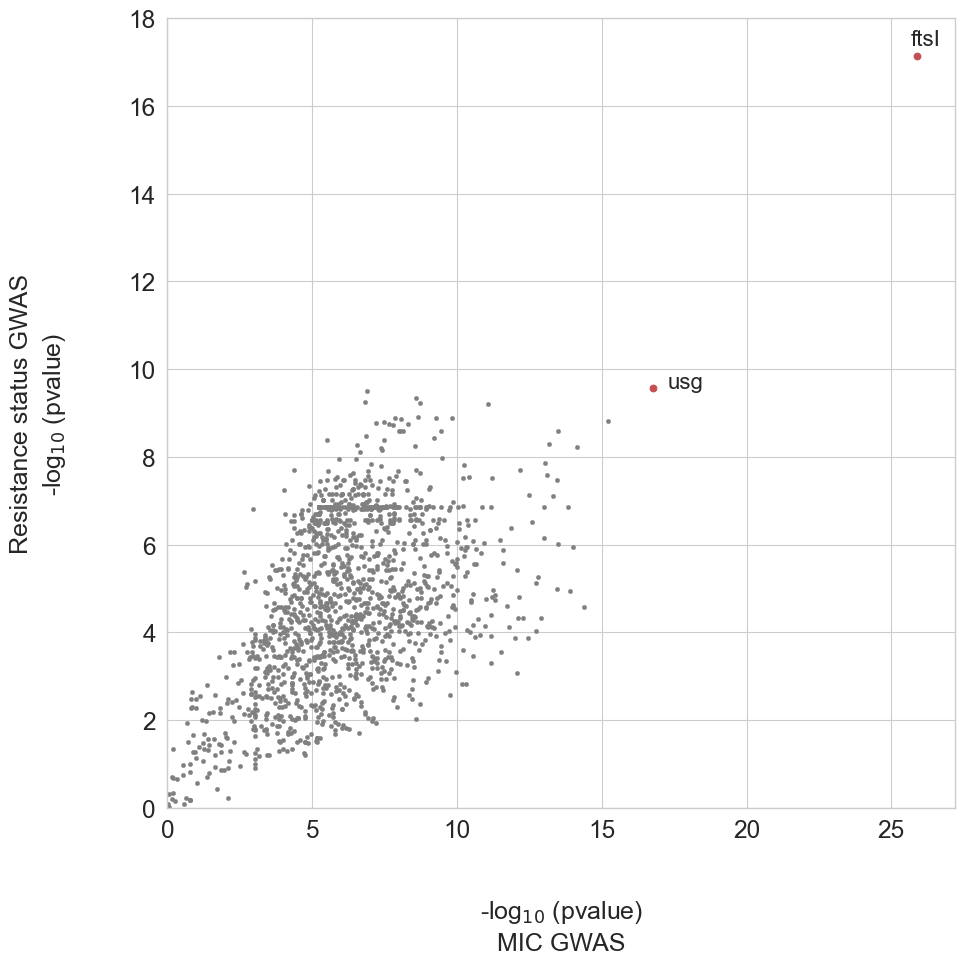

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid') #  {darkgrid, whitegrid, dark, white, ticks}
# sns.despine()
fig, ax = plt.subplots(figsize=(10,10))

fontsize_genes = 'small'


sns.scatterplot(data=df_genes_intersect, x='pvalue_linreg_log10', y='pvalue_logreg_log10', s=10, color='grey', edgecolor=None, ax=ax)
# ax.set(xlabel='-log$_{10}$ (pvalue) \n linear regression', ylabel='-log$_{10}$ (pvalue) \n logistic regression')
ax.set(xlabel='', ylabel='')

ax.text(0.5, -0.14, "-log$_{10}$ (pvalue)", fontsize=18, ha='center', transform=ax.transAxes)
ax.text(0.5, -0.18, "MIC GWAS", fontsize=18, ha='center', transform=ax.transAxes)


ax.text(-0.2, 0.5, "Resistance status GWAS" , fontsize=18, va='center',  rotation='vertical', transform=ax.transAxes)
ax.text(-0.16, 0.5, "-log$_{10}$ (pvalue)" , fontsize=18, va='center',  rotation='vertical', transform=ax.transAxes)

ax.set_xlim(0)
ax.set_ylim(0)

ax.set_yticks([0,2,4,6,8,10,12,14,16,18])

# ax.text(0.05, 0.95, 'C', transform=ax[0].transAxes,
#             fontsize=16, fontweight='bold', va='top')


genes_to_label_all = ['usg CDS'] # 'ftsI CDS'
df_labels_all = df_genes_intersect[df_genes_intersect['gene.name'].isin(genes_to_label_all)]
df_labels_all['gene.name'] = df_labels_all['gene.name'].str.split(' ').str[0]


for line in range(0, df_labels_all.shape[0]):
  
    # ax.annotate( df_labels_all['gene.name'][line], (df_labels_all.pvalue_linreg_log10[line]+0.1, df_labels_all.pvalue_logreg_log10[line]),
    #             xytext=(1.5, 1.5), textcoords='offset points', size='xx-small', arrowprops=dict(facecolor='black', shrink=0.005))
     ax.text(df_labels_all.pvalue_linreg_log10.iloc[line]+0.5, df_labels_all.pvalue_logreg_log10.iloc[line], 
     df_labels_all['gene.name'].iloc[line], horizontalalignment='left', 
     size=fontsize_genes)#, color='black', weight='semibold')
     plt.scatter(x=df_labels_all.pvalue_linreg_log10.iloc[line], y=df_labels_all.pvalue_logreg_log10.iloc[line], color='r')


dp_ftsI = df_genes_intersect[df_genes_intersect['gene.name'].isin(['ftsI CDS'])]

ax.text(dp_ftsI.pvalue_linreg_log10.iloc[0]+.8, dp_ftsI.pvalue_logreg_log10.iloc[0]+0.25, 
    'ftsI', horizontalalignment='right', 
     size=fontsize_genes)

plt.scatter(x=dp_ftsI.pvalue_linreg_log10.iloc[0], y=dp_ftsI.pvalue_logreg_log10.iloc[0], color='r')

dp_Unchar = df_genes_intersect[df_genes_intersect['gene.name'].isin(['Uncharacterized protein CDS'])]

# ax[0].text(dp_Unchar.pvalue_linreg_log10.iloc[0]+0.5, dp_Unchar.pvalue_logreg_log10.iloc[0], 
#      'Rd_05960', horizontalalignment='left', 
#      size='xx-small')




fig.tight_layout()
# fig.subplots_adjust(bottom=-0.5)
plt.show()
fig.savefig('../test/combined_plot_all.pdf')
# fig.savefig('../test/combined_plot_nonsym.pdf')

/var/folders/nz/xcg6fxln5r9cgfczkxrxx0p00000gn/T/ipykernel_2262/3367505014.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels_nonsym['gene.name'] = df_labels_nonsym['gene.name'].str.split(' ').str[0]


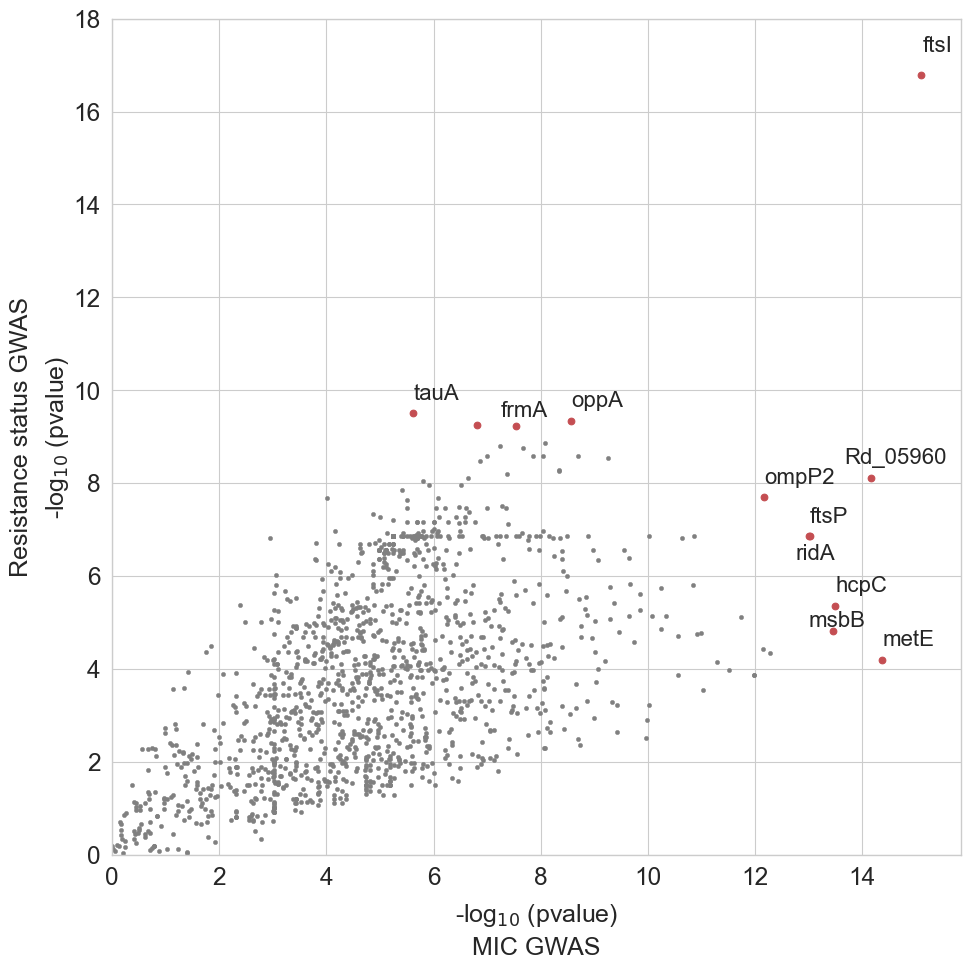

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid') #  {darkgrid, whitegrid, dark, white, ticks}
# sns.despine()
fig, ax = plt.subplots(figsize=(10,10))

fontsize_genes = 'small'

sns.scatterplot(data=df_genes_intersect_nonsym, x='pvalue_linreg_log10', y='pvalue_logreg_log10', s=10, color='grey', edgecolor=None, ax=ax)
# ax.set(xlabel='-log$_{10}$ (pvalue) \n linear regression', ylabel='-log$_{10}$ (pvalue) \n logistic regression')
ax.set(xlabel='', ylabel='')

ax.text(0.5, -0.08, "-log$_{10}$ (pvalue)", fontsize=18, ha='center', transform=ax.transAxes)
ax.text(0.5, -0.12, "MIC GWAS", fontsize=18, ha='center', transform=ax.transAxes)


ax.text(-0.12, 0.5, "Resistance status GWAS" , fontsize=18, va='center',  rotation='vertical', transform=ax.transAxes)
ax.text(-0.08, 0.5, "-log$_{10}$ (pvalue)" , fontsize=18, va='center',  rotation='vertical', transform=ax.transAxes)

ax.set_yticks([0,2,4,6,8,10,12,14,16,18])

ax.set_xlim(0)
ax.set_ylim(0)


genes_to_label_nonsym = [ 'metE CDS', 'hcpC CDS', 'tauA CDS', 'oppA CDS', 'ompP2 CDS', 'ftsP CDS'] # 
df_labels_nonsym = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(genes_to_label_nonsym)]
df_labels_nonsym['gene.name'] = df_labels_nonsym['gene.name'].str.split(' ').str[0]

for line in range(0, df_labels_nonsym.shape[0]):
  
    # ax.annotate( df_labels['gene.name'][line], (df_labels.pvalue_linreg_log10[line]+0.1, df_labels.pvalue_logreg_log10[line]),
    #             xytext=(1.5, 1.5), textcoords='offset points', size='xx-small', arrowprops=dict(facecolor='black', shrink=0.005))
     ax.text(df_labels_nonsym.pvalue_linreg_log10.iloc[line], df_labels_nonsym.pvalue_logreg_log10.iloc[line]+0.3, 
     df_labels_nonsym['gene.name'].iloc[line], horizontalalignment='left', 
     size=fontsize_genes)#, color='black', weight='semibold')
     plt.scatter(x=df_labels_nonsym.pvalue_linreg_log10.iloc[line], y=df_labels_nonsym.pvalue_logreg_log10.iloc[line], color='r')

dp_ftsI = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['ftsI CDS'])]

ax.text(dp_ftsI.pvalue_linreg_log10.iloc[0]+.6, dp_ftsI.pvalue_logreg_log10.iloc[0]+0.5, 
     'ftsI', horizontalalignment='right', 
     size=fontsize_genes)
plt.scatter(x=dp_ftsI.pvalue_linreg_log10.iloc[0], y=dp_ftsI.pvalue_logreg_log10.iloc[0], color='r')

dp_ridA = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['ridA CDS'])]

ax.text(dp_ridA.pvalue_linreg_log10.iloc[0]+.5, dp_ridA.pvalue_logreg_log10.iloc[0]-0.5, 
     'ridA', horizontalalignment='right', 
     size=fontsize_genes)
plt.scatter(x=dp_ridA.pvalue_linreg_log10.iloc[0], y=dp_ridA.pvalue_logreg_log10.iloc[0], color='r')

dp_frmA = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['frmA CDS'])]

ax.text(dp_frmA.pvalue_linreg_log10.iloc[0]+.6, dp_frmA.pvalue_logreg_log10.iloc[0]+0.2, 
     'frmA', horizontalalignment='right', 
     size=fontsize_genes)
plt.scatter(x=dp_frmA.pvalue_linreg_log10.iloc[0], y=dp_frmA.pvalue_logreg_log10.iloc[0], color='r')


dp_msbB = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['msbB CDS'])]

ax.text(dp_msbB.pvalue_linreg_log10.iloc[0]+.6, dp_msbB.pvalue_logreg_log10.iloc[0]+0.1, 
     'msbB', horizontalalignment='right', 
     size=fontsize_genes)
plt.scatter(x=dp_msbB.pvalue_linreg_log10.iloc[0], y=dp_msbB.pvalue_logreg_log10.iloc[0], color='r')


dp_Unchar = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['Uncharacterized protein CDS'])]

ax.text(dp_Unchar.pvalue_linreg_log10.iloc[0]-0.5, dp_Unchar.pvalue_logreg_log10.iloc[0]+0.3,
     'Rd_05960', horizontalalignment='left',
     size=fontsize_genes)
plt.scatter(x=dp_Unchar.pvalue_linreg_log10.iloc[0], y=dp_Unchar.pvalue_logreg_log10.iloc[0], color='r')

dp_30S = df_genes_intersect_nonsym[df_genes_intersect_nonsym['gene.name'].isin(['30S ribosomal protein S15 CDS'])]

# ax.text(dp_30S.pvalue_linreg_log10.iloc[0]-0.5, dp_30S.pvalue_logreg_log10.iloc[0]+0.3,
#      '30S ribosomal protein S15', horizontalalignment='left',
#      size=fontsize_genes)
plt.scatter(x=dp_30S.pvalue_linreg_log10.iloc[0], y=dp_30S.pvalue_logreg_log10.iloc[0], color='r')


fig.tight_layout()
# fig.subplots_adjust(bottom=-0.5)
plt.show()
fig.savefig('../test/combined_plot_nonsym.pdf')
# fig.savefig('../test/combined_plot_nonsym.pdf')

In [113]:
dp_Unchar

,variants_linreg,variant_position_linreg,variant_quality_linreg,pvalue_linreg,p_values.adj_linreg,mutation_linreg,r.squared,adj.r.squared,effect_linreg,gene.name,...,HLR-565_logreg,HLR-566_logreg,HLR-568_logreg,HLR-569_logreg,HLR-571_logreg,HLR-572_logreg,HLR-573_logreg,MAC_logreg,pvalue_linreg_log10,pvalue_logreg_log10
4,ID_1197610_C,1197610,21144.8,6.983385e-15,3.554182e-11,I221T (ATC/ACC),0.206149,0.20313,1.611659,Uncharacterized protein CDS,...,0,0,0,0,0,0,0,53,14.155934,8.220941


In [122]:
df_genes_intersect_nonsym.sort_values('pvalue_logreg')[:30]

,variants_linreg,variant_position_linreg,variant_quality_linreg,pvalue_linreg,p_values.adj_linreg,mutation_linreg,r.squared,adj.r.squared,effect_linreg,gene.name,...,HLR-565_logreg,HLR-566_logreg,HLR-568_logreg,HLR-569_logreg,HLR-571_logreg,HLR-572_logreg,HLR-573_logreg,MAC_logreg,pvalue_linreg_log10,pvalue_logreg_log10
0,ID_1688990_A,1688990,19487.80,8.064531e-16,9.156035e-12,M377I (ATG/ATT),0.218901,0.215931,1.333789,ftsI CDS,...,0,0,0,0,0,0,0,81,15.093421,16.787821
452,ID_674791_G,674791,26353.80,2.374528e-06,5.150917e-05,S121T (AGC/ACC),0.081322,0.077828,0.897092,tauA CDS,...,0,0,0,0,0,1,0,65,5.624423,9.504750
68,ID_829426_G,829426,21327.80,2.708588e-09,5.214015e-07,S250A (TCC/GCC),0.126099,0.122777,1.097758,oppA CDS,...,0,0,0,0,0,1,0,68,8.567257,9.346153
221,ID_1241568_T,1241568,28216.80,1.535114e-07,8.308588e-06,G29R (GGA/AGA),0.099612,0.096189,1.090560,30S ribosomal protein S15 CDS,...,0,0,0,0,0,0,0,46,6.813859,9.259833
142,ID_857249_G,857249,23392.80,2.937857e-08,2.883065e-06,N21D (AAT/GAT),0.110533,0.107151,1.039652,frmA CDS,...,0,0,0,0,0,0,0,66,7.531969,9.232949
97,ID_1620640_A,1620640,26044.80,8.366653e-09,1.170499e-06,E237K (GAG/AAG),0.118762,0.115411,1.201199,prmB CDS,...,0,0,0,0,0,0,0,48,8.077448,8.854920
175,ID_902392_T,902392,24368.80,5.758913e-08,4.414898e-06,R348L (CGT/CTT),0.106100,0.102701,1.051139,nagA CDS,...,0,0,0,0,0,0,0,58,7.239659,8.797035
132,ID_746277_A,746277,23656.80,2.152416e-08,2.297554e-06,G159R (GGA/AGA),0.112577,0.109203,0.978782,ychJ CDS,...,0,0,0,0,1,0,0,80,7.667074,8.755726
103,ID_630084_A,630084,23675.80,8.992466e-09,1.210718e-06,V264M (GTG/ATG),0.118291,0.114939,1.232516,accA CDS,...,0,0,0,0,0,0,0,44,8.046121,8.587326
200,ID_525331_A,525331,30759.80,1.017474e-07,6.441114e-06,V953I (GTT/ATT),0.102338,0.098925,-1.407429,rpoC CDS,...,0,0,0,0,0,0,0,44,6.992477,8.587326


In [99]:
import plotly
import plotly.express as px

hover_data = ['variant_position_linreg', 'variant_position_logreg', 'mutation_linreg', 'mutation_logreg', 'gene.name','gene.product_linreg', 'gene.type_linreg', 'MAC_linreg', 'MAC_logreg']

fig = px.scatter(df_genes_intersect, x='pvalue_linreg_log10', y='pvalue_logreg_log10', hover_data=hover_data, hover_name='gene.name', width=1000, height=1000)
# df_genes_intersect
# fig.show()
plotly.offline.plot(fig, filename='../test/linreg_vs_logreg_topsnp_per_gene_all.html')

'../test/linreg_vs_logreg_topsnp_per_gene_all.html'

### Combined manhattan plot 

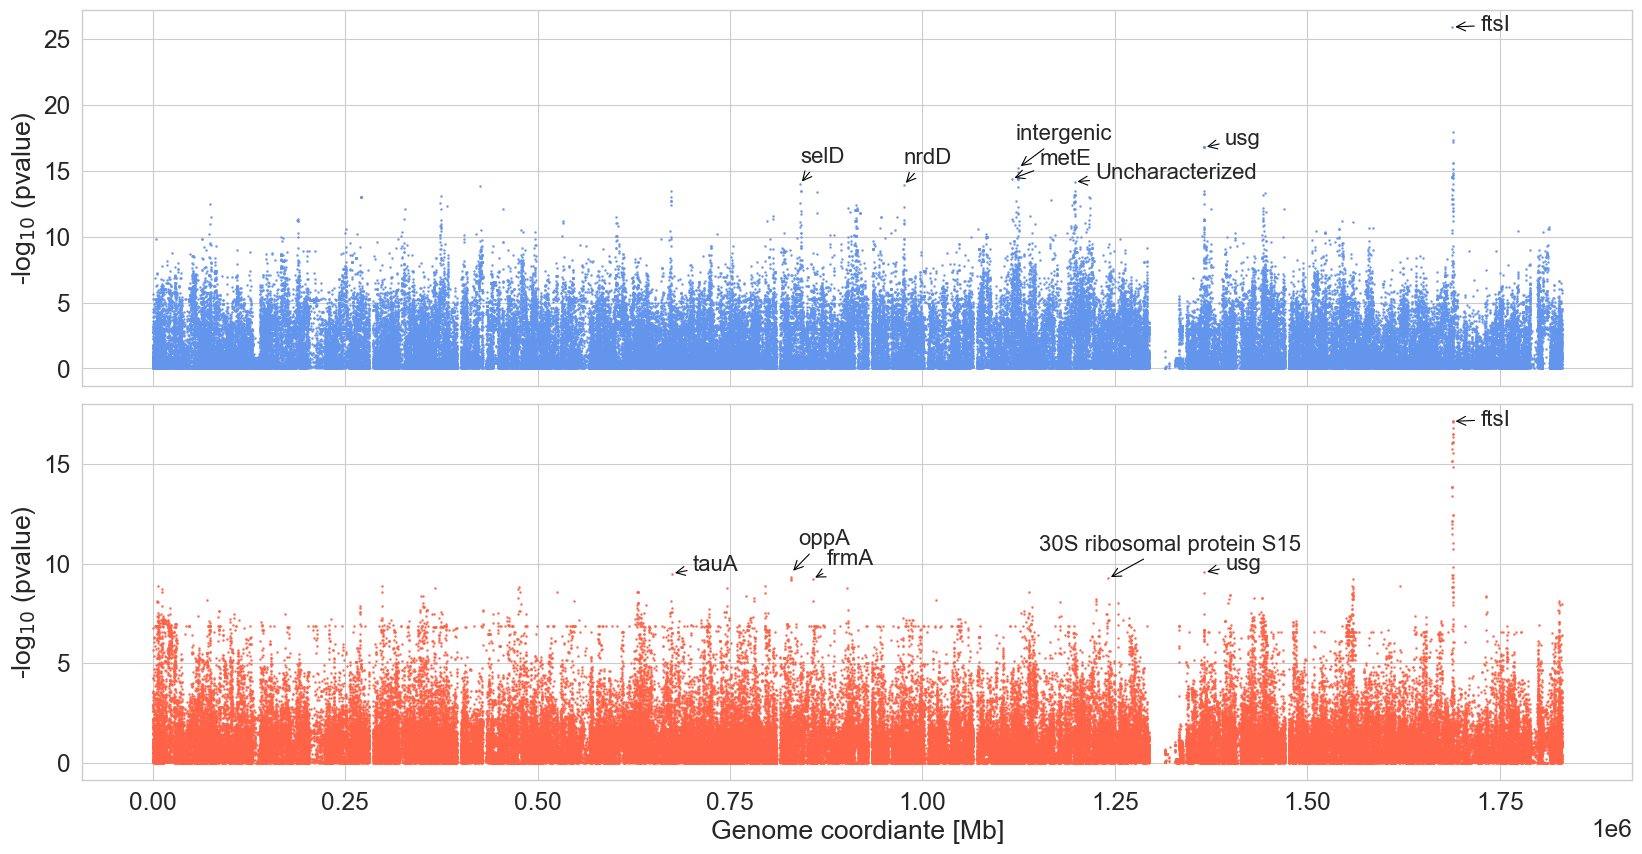

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper", font_scale=2)
sns.set_style('whitegrid')

a4_dims = ( 8.27, 10 /2)
fig, ax = plt.subplots(2,1, sharex=True, sharey=False, figsize=(20,10))


marker_size = 2.5
fontsize_label = 'small'

## Linear

sns.scatterplot(data=df_linreg_log2, x='variant_position', y='-log_10(pvalue)',   ax=ax[0], edgecolor=None, s=marker_size,  color='cornflowerblue')
ax[0].set(xlabel='Genome coordiante [Mb]', ylabel='-log$_{10}$ (pvalue)')
# ax[0].set_title('Linear regression')

df_linreg_log2_labels = df_linreg_log2.sort_values('pvalue').drop_duplicates('gene.name')[:7]
df_linreg_log2_labels['gene.name'] = df_linreg_log2_labels['gene.name'].str.split(' ').str[0]
df_linreg_log2_labels['gene.name'] = df_linreg_log2_labels['gene.name'].replace('', 'intergenic')

dp_inter = df_linreg_log2_labels[df_linreg_log2_labels['gene.name'] == 'intergenic']
dp_ftsI = df_linreg_log2_labels[df_linreg_log2_labels['gene.name'] == 'ftsI']
dp_metE = df_linreg_log2_labels[df_linreg_log2_labels['gene.name'] == 'metE']
dp_nrdD = df_linreg_log2_labels[df_linreg_log2_labels['gene.name'] == 'nrdD']
dp_selD = df_linreg_log2_labels[df_linreg_log2_labels['gene.name'] == 'selD']


df_linreg_log2_labels = df_linreg_log2_labels.query("`gene.name` != 'intergenic'").query("`gene.name` != 'ftsI'").query("`gene.name` != 'metE'").query("`gene.name` != 'nrdD'").query("`gene.name` != 'selD'")

for line in range(0, df_linreg_log2_labels.shape[0]):
  
    ax[0].annotate( df_linreg_log2_labels['gene.name'].iloc[line], (df_linreg_log2_labels.variant_position.iloc[line]+0.1, df_linreg_log2_labels['-log_10(pvalue)'].iloc[line]),
                xytext=(15, 2), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
     # ax[0].text(df_linreg_log2_labels.variant_position.iloc[line]+0.5, df_linreg_log2_labels['-log_10(pvalue)'].iloc[line]-0.03, 
     # df_linreg_log2_labels['gene.name'].iloc[line], horizontalalignment='left', 
     # size=fontsize_label)#, color='black', weight='semibold')

ax[0].annotate(dp_inter['gene.name'].iloc[0], (dp_inter.variant_position.iloc[0]+0.1, dp_inter['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(-2, 20), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[0].annotate(dp_ftsI['gene.name'].iloc[0], (dp_ftsI.variant_position.iloc[0]+0.1, dp_ftsI['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(20, -3), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[0].annotate(dp_metE['gene.name'].iloc[0], (dp_metE.variant_position.iloc[0]+0.1, dp_metE['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(20, 10), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[0].annotate(dp_nrdD['gene.name'].iloc[0], (dp_nrdD.variant_position.iloc[0]+0.1, dp_nrdD['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(0, 15), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[0].annotate(dp_selD['gene.name'].iloc[0], (dp_selD.variant_position.iloc[0]+0.1, dp_selD['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(0, 15), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))


## Logistic

sns.scatterplot(data=df_logreg, x='variant_position', y='-log_10(pvalue)',   ax=ax[1], edgecolor=None, s=marker_size , color='tomato')
ax[1].set(xlabel='Genome coordiante [Mb]', ylabel='-log$_{10}$ (pvalue)')
# ax[1].set_title('Logistic regression')
ax[1].set_yticks([0,5,10,15,18])

df_logreg_labels = df_logreg.sort_values('pvalue').drop_duplicates('gene.name')[:6]
df_logreg_labels['gene.name'] = df_logreg_labels['gene.name'].str.split(' ').str[0]
dp_frmA = df_logreg_labels[df_logreg_labels['gene.name'] == 'frmA']
dp_oppA = df_logreg_labels[df_logreg_labels['gene.name'] == 'oppA']
dp_30S = df_logreg_labels[df_logreg_labels['gene.name'] == '30S']
dp_ftsI = df_logreg_labels[df_logreg_labels['gene.name'] == 'ftsI']


df_logreg_labels = df_logreg_labels.query("`gene.name` != 'frmA'").query("`gene.name` != 'oppA'").query("`gene.name` != '30S'").query("`gene.name` != 'ftsI'")


for line in range(0, df_logreg_labels.shape[0]):
  
    ax[1].annotate( df_logreg_labels['gene.name'].iloc[line], (df_logreg_labels.variant_position.iloc[line]+0.1, df_logreg_labels['-log_10(pvalue)'].iloc[line]), xycoords='data',
                xytext=(15, 2), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
     # ax[1].text(df_logreg_labels.variant_position.iloc[line]+0.5, df_logreg_labels['-log_10(pvalue)'].iloc[line]-0.03, 
     # df_logreg_labels['gene.name'].iloc[line], horizontalalignment='left', 
     # size=fontsize_label)#, color='black', weight='semibold')

ax[1].annotate(dp_frmA['gene.name'].iloc[0], (dp_frmA.variant_position.iloc[0]+0.1, dp_frmA['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(10, 10), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[1].annotate(dp_oppA['gene.name'].iloc[0], (dp_oppA.variant_position.iloc[0]+0.1, dp_oppA['-log_10(pvalue)'].iloc[0]+0.2), xycoords='data',
                xytext=(5, 20), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[1].annotate('30S ribosomal protein S15', (dp_30S.variant_position.iloc[0]+0.1, dp_30S['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(-50, 20), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))
ax[1].annotate(dp_ftsI['gene.name'].iloc[0], (dp_ftsI.variant_position.iloc[0], dp_ftsI['-log_10(pvalue)'].iloc[0]), xycoords='data',
                xytext=(20, -3), textcoords='offset points', size=fontsize_label,  arrowprops=dict(arrowstyle= '->',color='black'))

ax[1].set_yticks([0,5,10,15])
# ax[1].set_xticks([0.00, 0.50, 1,00, 1,75])

# fig.set_tight_layout(True)
fig.subplots_adjust(hspace=0.05)
# fig.savefig("../test/manhattan_plot_combined.pdf")
# fig.savefig("../test/manhattan_plot_combined.png")


In [488]:
import seaborn.objects as so

## Pyseer mixed effects

### Continuous MIC, $log_2$

In [410]:
df_lmm_results = pd.read_csv('../results/pyseer/ampicillin_snps_mic_log2_genes.txt', sep=',', index_col=False).assign(variant=lambda x: 'ID_' + x['variant'].str.split('_').str[2] + '_' + x['variant'].str.split('_').str[4]).rename(columns={'variant': 'id'})
df_mapping = pd.read_csv('../results/mapping.csv')
n_samples = pd.read_csv('../results/pyseer/samples_mic.txt', header=None).shape[0]

df_lmm_results_mutation = (pd.merge(df_lmm_results, df_mapping, how='left', on='id', validate='one_to_one')
        # .drop(columns=['position']) # 'pvalue', 'p_values.adj', 'effect', 'r.squared', 'adj.r.squared', 'mutation'
)
ref = df_lmm_results_mutation['mutation'].str.split().str[0].str[0]
alt = df_lmm_results_mutation['mutation'].str.split().str[0].str[-1]
df_lmm_results_mutation['mutation_type'] = ((df_lmm_results_mutation['mutation'].isna()) | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')
df_lmm_results_mutation['-log_10(pvalue)'] = - np.log10(df_lmm_results_mutation['lrt.pvalue'])

df_lmm_results_mutation['af'] = np.where(df_lmm_results_mutation['af'] > 0.5, 1- df_lmm_results_mutation['af'], df_lmm_results_mutation['af'])
df_lmm_results_mutation['MAC'] = np.round(df_lmm_results_mutation['af'] * n_samples).astype(int)


# df_lmm_results_mutation.sort_values('lrt.pvalue')[:20]

In [358]:
df_lmm_results_mutation['af'].max()

0.498

In [411]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, min_MAC: int) -> pd.DataFrame:
    return dataframe.query("@min_MAC <= MAC")

def filter_pvalue(dataframe: pd.DataFrame, min_pvalue: float) -> pd.DataFrame:
    return dataframe.query('@min_pvalue > pvalue')

def filter_mutation_type(dataframe: pd.DataFrame) -> pd.DataFrame:
    return dataframe.query("mutation_type == 'nonsynonymous'")
    

hover_data = ['lrt.pvalue', 'mutation', 'gene.name','gene.product', 'gene.type', 'MAC']

fig = px.scatter(df_lmm_results_mutation, x='position_x', y='-log_10(pvalue)', color='mutation_type', hover_data=hover_data)

fig.update_layout(title='manhattan_lmm_mic_log2')
plotly.offline.plot(fig, filename='../test/manhattan_lmm_mic_log2.html')
# fig

'../test/manhattan_lmm_mic_log2.html'

### Binary

In [389]:
df_lmm_bin_results = pd.read_csv('../results/pyseer/ampicillin_snps_bin_genes.txt', sep=',', index_col=False).assign(variant=lambda x: 'ID_' + x['variant'].str.split('_').str[2] + '_' + x['variant'].str.split('_').str[4]).rename(columns={'variant': 'id'})
df_mapping = pd.read_csv('../results/mapping.csv')

df_lmm_bin_results_mutation = (pd.merge(df_lmm_bin_results, df_mapping, how='left', on='id', validate='one_to_one')
        # .drop(columns=['position']) # 'pvalue', 'p_values.adj', 'effect', 'r.squared', 'adj.r.squared', 'mutation'
)
ref = df_lmm_bin_results_mutation['mutation'].str.split().str[0].str[0]
alt = df_lmm_bin_results_mutation['mutation'].str.split().str[0].str[-1]
df_lmm_bin_results_mutation['mutation_type'] = ((df_lmm_bin_results_mutation['mutation'].isna()) | (ref == alt)).apply(lambda x: 'synonymous' if x else 'nonsynonymous')
df_lmm_bin_results_mutation['-log_10(pvalue)'] = - np.log10(df_lmm_bin_results_mutation['lrt.pvalue'])

# df_lmm_bin_results_mutation.sort_values('lrt.pvalue')[:20]

In [390]:
import plotly
import plotly.express as px

def filter_MAC(dataframe: pd.DataFrame, min_MAC: int) -> pd.DataFrame:
    return dataframe.query("@min_MAC <= MAC")

def filter_pvalue(dataframe: pd.DataFrame, min_pvalue: float) -> pd.DataFrame:
    return dataframe.query('@min_pvalue > pvalue')

def filter_mutation_type(dataframe: pd.DataFrame) -> pd.DataFrame:
    return dataframe.query("mutation_type == 'nonsynonymous'")
    

hover_data = ['lrt.pvalue', 'mutation', 'gene.name','gene.product', 'gene.type']

fig = px.scatter(df_lmm_bin_results_mutation, x='position_x', y='-log_10(pvalue)', color='mutation_type', hover_data=hover_data)
fig.update_layout(title='manhattan_lmm_bin')
plotly.offline.plot(fig, filename='../test/manhattan_lmm_bin.html')
# fig

'../test/manhattan_lmm_bin.html'

## Number of variants based on vcf records

In [178]:
import pandas as pd
import plotly.express as px

df_variant_count = pd.read_csv('../results/stats.tsv', sep='\t', names=['SampleID', 'record_count', 'het1', 'het2']).assign(SampleID= lambda df: df['SampleID'].str.split('_').str[0])
df_negative = pd.read_excel("../vcf_Haemophilus/annotation_files/metadata_HLR_extern.xlsx", sheet_name='blac_negative')
df_positive = pd.read_excel("../vcf_Haemophilus/annotation_files/metadata_HLR_extern.xlsx", sheet_name='excluded_blac_positive')
df_pos_neg = pd.concat((df_negative, df_positive))
df_metadata = pd.merge(df_pos_neg, df_variant_count, on='SampleID')

fig = px.histogram(df_metadata, x="record_count", nbins=1000, color='serotype',  marginal="rug", hover_data=df_metadata.columns.drop('SampleID'), hover_name='SampleID')
# fig.show()
plotly.offline.plot(fig, filename='../test/histogram_variant_counts_per_isolate.html')


'../test/histogram_variant_counts_per_isolate.html'

In [33]:
import pandas as pd

df_strain_haplos_ftsI = pd.read_csv('/Users/lbartels/Desktop/hihi/isolate_ftsI_haplotypes.txt', sep='\t', index_col=0).assign(haplo_str= lambda df: df.apply(''.join, axis=1)).reset_index()#[['index', 'haplo_str']]
df_haplos_ftsI = pd.read_csv('/Users/lbartels/Desktop/hihi/linreg_nonsynonymous_haplotypeTable.txt', sep='\t').assign(haplo_str= lambda df: df.iloc[:,1:].apply(''.join, axis=1)).reset_index()[['index', 'haplo_str']]


df_strain_to_haplo_ftsI = pd.merge(df_strain_haplos_ftsI, df_haplos_ftsI, how='left', on='haplo_str', validate='many_to_one')


# col = df.pop("Mid")
# df.insert(0, col.name, col)


col = df_strain_to_haplo_ftsI.pop('index_y')
df_strain_to_haplo_ftsI.insert(1,'haplotype', col)
df_strain_to_haplo_ftsI.drop(['haplo_str'], axis=1).rename(columns={'index_x': 'ID'}).to_excel("../test/output.xlsx", index=False)

In [3]:
import pandas as pd

df_strain_haplos_ftsI_transpep = pd.read_csv('/Users/lbartels/Desktop/hihi/isolate_transpep_haplotypes.txt', sep='\t', index_col=0).assign(haplo_str= lambda df: df.apply(''.join, axis=1)).reset_index()#[['index', 'haplo_str']]
df_haplos_ftsI_transpep = pd.read_csv('/Users/lbartels/Desktop/hihi/linreg_nonsynonymous_transpep_haplotypeTable.txt', sep='\t').assign(haplo_str= lambda df: df.iloc[:,1:].apply(''.join, axis=1)).reset_index()[['index', 'haplo_str']]


df_strain_to_haplo_ftsI_transpep = pd.merge(df_strain_haplos_ftsI_transpep, df_haplos_ftsI_transpep, how='left', on='haplo_str', validate='many_to_one')


# col = df.pop("Mid")
# df.insert(0, col.name, col)


col = df_strain_to_haplo_ftsI_transpep.pop('index_y')
df_strain_to_haplo_ftsI_transpep.insert(1,'haplotype', col)
df_strain_to_haplo_ftsI_transpep.drop(['haplo_str'], axis=1).rename(columns={'index_x': 'ID'}).to_excel("../test/output2.xlsx", index=False)

In [5]:
df_strain_to_haplo_ftsI_transpep

,index_x,haplotype,A530S (GCA/TCA),N526K (AAT/AAA),N526K (AAT/AAG),A502V (GCA/GTA),A502T (GCA/ACA),G490E (GGA/GAA),R451S (CGT/AGT),I449V (ATT/GTT),S385T (AGT/ACT),M377I (ATG/ATT),S357N (AGC/AAC),D350N (GAT/AAT),haplo_str
0,HLR-106,H9,C,T,A,A,C,C,G,T,C,C,C,C,CTAACCGTCCCC
1,HLR-109,H1,C,A,A,G,C,C,G,T,C,C,C,C,CAAGCCGTCCCC
2,HLR-10,H12,C,A,C,G,C,C,G,T,C,C,C,C,CACGCCGTCCCC
3,HLR-110,H2,C,T,A,A,C,C,G,T,C,A,C,T,CTAACCGTCACT
4,HLR-111,H16,C,A,C,G,C,T,G,T,C,C,C,C,CACGCTGTCCCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,HLR-568,H8,C,A,C,G,T,C,G,T,C,C,C,T,CACGTCGTCCCT
261,HLR-569,H8,C,A,C,G,T,C,G,T,C,C,C,T,CACGTCGTCCCT
262,HLR-571,H1,C,A,A,G,C,C,G,T,C,C,C,C,CAAGCCGTCCCC
263,HLR-572,H1,C,A,A,G,C,C,G,T,C,C,C,C,CAAGCCGTCCCC


In [57]:
import pandas as pd

df_322 = pd.read_excel('/Users/lbartels/Desktop/hihi/322_ids.xlsx')
df_mapping = df_strain_to_haplo_ftsI.loc[:,['index_x', 'haplotype']]

pd.merge(df_322, df_mapping, left_on='ID', right_on='index_x', validate='many_to_one',how='left')['haplotype']

haplotype
H1     33
H2     25
H3     15
H4     14
H6     11
H5     11
H7      6
H11     6
H10     6
H8      6
H9      6
H12     5
H15     5
H13     5
H14     5
H17     4
H18     4
H16     4
H23     3
H21     3
Name: count, dtype: int64